 # ORAIMO SALES FORECASTING (TIME SERIES ANALYSIS)
>Forecasting Monthly Sales for October 2024 Based on Historical Sales Data

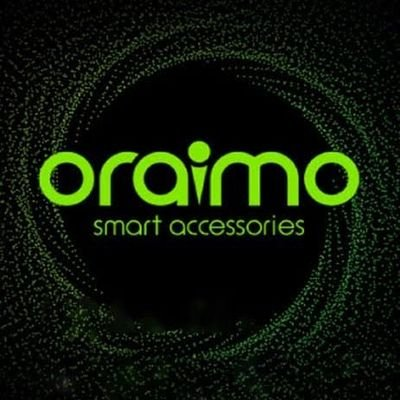

## Everything Data Group Members
> 1. Calvince Kaunda
> 2. Gloryann Otieno
> 3. Peter Nyakundi
> 4. Samuel Marimbi
> 5. Sanayet Sankaine
  
## Project Summary
>This project focuses on building a time series forecasting model for Oraimo, a consumer electronics brand. Using sales data from January to September 2024, we aim to predict sales revenue for October 2024. The project will help improve demand planning, minimize stockouts and overstocking, and enable more informed inventory and marketing decisions.

## 1. Business Understanding
>Launched in 2013, Oraimo has grown into Africa’s leading smart-accessories brand. Since entering Kenya in 2013, it has established a strong presence through its e-shop local retail stores and service centers.

>The brand offers a wide range of products including earbuds, power banks and personal care devices.

>Oraimo stands out for its affordable pricing, loyalty programs, strong after-sales support and strategic marketing through influencers and tech events.
With steady sales activity and regional

## 2. Business Problem
>Oraimo experiences dynamic sales fluctuations across different product categories and cities over time. Without accurate sales forecasting, the company risks financial inefficiencies such as revenue loss from missed sales opportunities or poor cash flow management. Analyzing sales data is crucial for assessing business performance and identifying improvement areas. Sales forecasting goes a step further by predicting future sales revenue, which supports better financial planning, budget allocation, and strategic decision-making across inventory management, workforce planning and supply chain operations.   


### Objectives
>- To build a time series model that forecasts sales figures for Oraimo for the month of October.  
>-To evaluate best performing cities and products.
>- To provide actionable insights to support better financial planning and resource allocation.
>- To create a forecasting dashboard


### Stakeholders
>- Oraimo Management Team – for strategic planning and decision-making
>- Sales and Inventory Teams – to improve stock management and meet customer demand
>- Supply Chain & Logistics Teams – for efficient distribution and resource allocation
>- Retailers & Shop Managers – to ensure timely product availability
>- Data & Business Analysts – to monitor performance and model accuracy

## Metrics Of Success
  
>- To achieve a forecasting model with RMSE and MAE < 1Million Ksh a day.  


## 2. Data Understanding
The Oraimo Sales dataset is from a Data Science community, DataVerse. The dataset contains historical sales records from January to October 2024 by Oraimo across multiple shops across the country.The dataset contains 19,802 rows and 14 columns.

#### Features:
**year** — Year of the sale (2024)  
**month** — Month name of the sale  
**date** — Raw string of the sale date  
**week** — Week number in the year  
**city** — Name of the city where the sale occurred  
**shop_name** — Name of the specific shop  
**model** — Specific product model sold  
**type** — Product type/category  
**quantity** — Number of units sold  
**sales_price** — Selling price per unit  
**amount** — Total revenue from the sale (quantity × sales_price)  
**source** — Sales channel   
**proper_date** — Cleaned datetime format of the sale  
**city_2** — Additional city labeling

#### Data Limitations

1. **Limited temporal span**  
   - Only Jan–Oct 2024: insufficient to capture annual seasonality (e.g., year-end sales).  
2. **No promotion or marketing data**  
   - Campaign effects (e.g., “Back to School” discounts) aren’t in the CSV, so promotional uplift is unmodeled.  
3. **Single snapshot export**  
   - Lacks real-time inventory on-hand or returns data
4. **large outliers**
   - the data has a signigicant amount of outliers




>### 2.1 Load the dataset
We begin by loading the dataset into a pandas DataFrame for further processing and analysis.This allows us to inspect the structure of the dataset, understand what we are working with and begin cleaning and transforming the data.


In [ ]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:

#read in the dataset
data = pd.read_csv("clean_oraimo.csv")

#viewing first few rows of dataset
data.head()

,year,month,date,week,city,shop_name,model,type,quantity,sales_price,amount,source,proper_date,city_2
0,2024.0,JANUARY,02/Jan,1.0,NAIROBI,ABDI WALI HIISH,OCD-C53,CABLE,15,135.0,2025.0,NOORTECH,2024-01-02,NAIROBI
1,2024.0,JANUARY,02/Jan,1.0,NAIROBI,ABDI WALI HIISH,OCD-M53,CABLE,20,85.0,1700.0,NOORTECH,2024-01-02,NAIROBI
2,2024.0,JANUARY,02/Jan,1.0,NAIROBI,ABDI WALI HIISH,OCD-M53,CABLE,200,85.0,17000.0,NOORTECH,2024-01-02,NAIROBI
3,2024.0,JANUARY,02/Jan,1.0,NAIROBI,ABDI WALI HIISH,OCW-U66S+C53,CHARGER KIT,15,385.0,5775.0,NOORTECH,2024-01-02,NAIROBI
4,2024.0,JANUARY,02/Jan,1.0,NAIROBI,ABDI WALI HIISH,OCW-U66S+C53,CHARGER KIT,15,385.0,5775.0,NOORTECH,2024-01-02,NAIROBI


>### 2.2 Dataframe Shape
We evaluate the shape of our dataset to identify the number of rows and columns.  


In [3]:
#shape of dataframe
print(f"Rows : {data.shape[0]}")
print(f"Columns : {data.shape[1]}")

Rows : 19802
Columns : 14


>### 2.3 Dataset Information
We examine the basic structure of the data to understand its composition, including the number of entries, columns, data types and missing values. This will help us determine how to clean and preprocess the data.


In [4]:
#general overview of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         19800 non-null  float64
 1   month        19801 non-null  object 
 2   date         19801 non-null  object 
 3   week         19801 non-null  float64
 4   city         19801 non-null  object 
 5   shop_name    19801 non-null  object 
 6   model        19800 non-null  object 
 7   type         19781 non-null  object 
 8   quantity     19802 non-null  int64  
 9   sales_price  19802 non-null  float64
 10  amount       19802 non-null  float64
 11  source       19801 non-null  object 
 12  proper_date  19802 non-null  object 
 13  city_2       19801 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.1+ MB


>### 2.4 Dataset General Statistics
In this step, we generate descriptive statistics of the dataset to understand the distribution of numerical features. This includes measures like mean, standard deviation, minimum and maximum values for each numerical column.


In [5]:
#general statistics
data.describe()

,year,week,quantity,sales_price,amount
count,19800.0,19801.000000,19802.000000,19802.000000,1.980200e+04
mean,2024.0,22.855209,135.822442,291.815469,4.052269e+04
std,0.0,11.644828,395.830110,159.611966,9.452771e+04
min,2024.0,1.000000,1.000000,0.000000,0.000000e+00
25%,2024.0,13.000000,12.000000,161.000000,1.350000e+04
50%,2024.0,25.000000,50.000000,330.000000,1.925000e+04
75%,2024.0,33.000000,112.000000,330.000000,3.500000e+04
max,2024.0,40.000000,30240.000000,1000.000000,6.773760e+06


From the above statistical analysis we can see there are some large outliers on the amount column.


>### 2.5 Check for missing values
We check for missing values in the dataset and evaluate their number to decide on the best way for handling them


In [6]:
#check for missing values
print(f"The dataset contains {data.isnull().sum().sum()} missing values")

The dataset contains 32 missing values


>### 2.6 Check for duplicate values
We evaluate the duplicates present in our dataset in order to decide on the proper handling method for duplicates


In [7]:
print(f"The dataset contains {data.duplicated().sum()} duplicate values")

The dataset contains 299 duplicate values


## 3. Data Cleaning
In this step, we clean the dataset by handling missing values, duplicate values, standardizing data, dropping irrelevant columns and addressing any other issues to ensure that the data is reliable and ready for further analysis.


>### 3.1 Handling missing values and duplicates
Our dataset does not contain a lot of duplicates and missing values hence the most appropriate method for handling them is to drop the values as they do not represent a large portion of the dataset.


In [8]:
#drop duplicates and re-evaluate shape

df = data.drop_duplicates()

df.shape

(19503, 14)

In [9]:
#drop missing values
df = df.dropna(axis = 0)

#re-evaluate shape after dropping the rows
df.shape

(19480, 14)

>### 3.2 Standardize the `month` and `type` column
Some entries in the `month` and `type`columns are in lowercase while others are in uppercase. To ensure consistency and avoid issues during analysis, we convert all values in both columns to uppercase.


In [10]:
df["month"] = df["month"].str.upper()
df["type"] = df["type"].str.upper()

>### 3.3 Rename relevant columns and drop irrelevant ones
In this section,we rename the `type` column to `product_type` for better readability and understanding.  
Columns such as `city_2`, `year`, `source`, `shop_name`, `proper_date` and `model` are irrelevant and need to be dropped.


In [11]:
#maintain relevant columns
df["date"] = df["proper_date"]

#rename type column
df = df.rename(columns = {"type":"product_type"})


df = df.drop(["city_2","year","proper_date","source","shop_name","model"], axis=1)
df.head()

,month,date,week,city,product_type,quantity,sales_price,amount
0,JANUARY,2024-01-02,1.0,NAIROBI,CABLE,15,135.0,2025.0
1,JANUARY,2024-01-02,1.0,NAIROBI,CABLE,20,85.0,1700.0
2,JANUARY,2024-01-02,1.0,NAIROBI,CABLE,200,85.0,17000.0
3,JANUARY,2024-01-02,1.0,NAIROBI,CHARGER KIT,15,385.0,5775.0
5,JANUARY,2024-01-02,1.0,NAIROBI,CHARGER KIT,5,385.0,1925.0


>### 3.4 Outliers
We decided not to drop the outliers because the high values are legitimate and expected for this dataset. Specifically, many product types are typically purchased in bulk, which naturally leads to large purchase amounts. These are not data entry errors or anomalies but rather reflect the true nature of customer purchasing behavior, so removing them would discard valuable, meaningful information.

> - The large values are meaningful, not mistakes.  
> - They reflect real-world patterns (bulk buying).  
> - Dropping them would reduce the dataset’s representativeness


>### 3.5 Evaluate entries in `city` and `product_type` columns
Some entries in the `city` and `product_type` columns have spelling errors.  
We begin by evaluating the entries to idenitfy where we have spelling errors and handle the inconsistencies.


In [12]:
#check city and product type columns
print(df["city"].unique())
print("")
print(df["product_type"].unique())

['NAIROBI' 'NYERI' 'MOMBASA' 'NAIROBI  OSMAN' 'KILIFI' 'KARATINA'
 'ELDORET' 'NAROK' 'BUNGOMA' 'KAKAMEGA' 'NAIROBI  MERCY' 'KITALE'
 'KERUGOYA' 'NANYUKI' 'RONGO' 'MACHAKOS' 'RUIRU' 'NAKURU' 'RUNYENJES'
 'KAPSABET' 'KIAMBU' 'MALINDI' 'NAIVASHA' 'TANZANIA' 'MERU' 'KISUMU'
 'WAJIR' 'THIKA' 'LITEIN' 'BOMET' 'SIRARE' 'KISII' 'KERICHO' 'MOYALE'
 'BAMBURI' 'SIAYA' 'UKUNDA' 'KITUI' 'GARISSA' 'OLJOROROK' 'RONGAI' 'EMBU'
 'GARISA' 'NYAHURURU' 'MALABA' 'WESTERN' 'CENTRAL' 'MIGORI' 'VOI'
 'RUIRU NAIROBI' 'KITUI NAIROBI' 'NAIROB  OSMAN' 'NAIROBI  MECY'
 'NAIRROBI  MERCY' 'NAIRIBO  MERCY' 'ISIBANIA' 'KAPENGURIA' 'CABANAS'
 'NAIROBI   MERCY' 'UGANDA' 'NAIROBI MERCY' 'KITENGELA' 'MAUA' 'NAIROB'
 'NAROBI' 'CHOGORIA' 'TOPAZ MOBILE ACCESSORIESNAIROBI' 'DIANI' 'MMMBASA'
 'MOYALE SHOP' 'BURUBURU' 'MMMBAMA' 'KARIS KADIRO' 'NYALI' 'LANGATA'
 'LIKONI' 'NAROBI  OSMAN' 'EXCEL' 'NAIROBI OSMAN' 'KIBWEZI' 'NANYUKU'
 'NAROBI  MERCY' 'NAIROBIOSMAN' 'RUNYEJES' 'KISIMU' 'NAIROB I OSMAN']

['CABLE' 'CHARGER KIT' 'EARPH

In the `city` column, we have entries such as Nairobi and Ruiru Nairobi  which need to be merged to a single entry:Nairobi,  
This also applies to the `product_type` column where there are mispellings and different variations of the same kind of product. Hence, we need to handle such inconsistencies.


In [13]:
#clean product_type column

df["product_type"] = df["product_type"].str.upper().replace({
    "CHARGERKIT.*|CHARGER.*|CAR CHAGER.*": "CHARGER KIT",
    "EARPHONES?.*": "EARPHONES",
    "WIRELESS EARPHONE": "EARPHONES",
    "CLIPPER.*": "CLIPPER",
    "POWER ?BANK.*": "POWER BANK",
    "FLASH(DISK|DRIVE).*": "FLASH DISK",
    "DATA CABLE|CABLE|IPHONE CABLE|DATA": "CABLE",
    "NECLESS|NECKLESS": "NECKLACE",
    "SHEIVER|SHAIVER": "SHAVER",
    "EXTENTION|EXTENSION": "EXTENSION CABLE",
    "BODY FAT SAID": "BODY FAT SCALE",
    "HEADPHONES|HEADSET BLUETOOTH": "HEADPHONES"
}, regex=True)


In [14]:
# Standardize 'City' column
city_cleaning_map = {
    # Nairobi variations
    'NAIROB': 'NAIROBI', 'NAROBI': 'NAIROBI', 'NAIROBI MERCY': 'NAIROBI',
    'NAIROBI  MERCY': 'NAIROBI', 'NAIROBI   MERCY': 'NAIROBI',
    'NAIRROBI  MERCY': 'NAIROBI', 'NAIRIBO  MERCY': 'NAIROBI',
    'NAIROB  OSMAN': 'NAIROBI', 'NAIROBI  OSMAN': 'NAIROBI',
    'NAIROB I OSMAN': 'NAIROBI', 'NAROBI  OSMAN': 'NAIROBI',
    'NAIROBI OSMAN': 'NAIROBI', 'NAIROBIOSMAN': 'NAIROBI',
    'RUIRU NAIROBI': 'NAIROBI', 'KITUI NAIROBI': 'NAIROBI',
    'TOPAZ MOBILE ACCESSORIESNAIROBI': 'NAIROBI','NAIROBI  MECY' : 'NAIROBI','NAROBI  MERCY' : 'NAIROBI', 'CABANAS': 'NAIROBI',

    # Nairobi estates to Nairobi
    'LANGATA': 'NAIROBI', 'KITENGELA': 'NAIROBI', 'BURUBURU': 'NAIROBI', 'RONGAI': 'NAIROBI',

    # Misspelled cities
    'MMMBASA': 'MOMBASA', 'MMMBAMA': 'MOMBASA',
    'KISIMU': 'KISUMU', 'RUNYEJES': 'RUNYENJES',
    'NANYUKU': 'NANYUKI', 'GARISA': 'GARISSA',

    # Coast towns to 'COAST'
    'MOMBASA': 'COAST', 'KILIFI': 'COAST', 'MALINDI': 'COAST',
    'UKUNDA': 'COAST', 'DIANI': 'COAST', 'NYALI': 'COAST',
    'LIKONI': 'COAST', 'BAMBURI': 'COAST', 'VOI': 'COAST',

    # Nyeri County
    'KARATINA': 'NYERI',
    # Migori County
    'RONGO': 'MIGORI', 'SIRARE': 'MIGORI', 'ISIBANIA': 'MIGORI',
    #Kiambu
    'RUIRU': 'KIAMBU', 'EXCEL': 'KIAMBU', 'THIKA': 'KIAMBU', 'OLJOROROK': 'NYAHURURU','LITEIN': 'KERICHO','MAUA': 'MERU', 'RUNYENJES': 'EMBU', 'MALABA': 'BUNGOMA', 'MOYALE SHOP': 'MOYALE'
}

# Apply the cleaning map
df['city'] = df['city'].replace(city_cleaning_map)


In [15]:
#confirm changes
print(df["city"].unique())
print("")
print(df["product_type"].unique())

['NAIROBI' 'NYERI' 'COAST' 'ELDORET' 'NAROK' 'BUNGOMA' 'KAKAMEGA' 'KITALE'
 'KERUGOYA' 'NANYUKI' 'MIGORI' 'MACHAKOS' 'KIAMBU' 'NAKURU' 'EMBU'
 'KAPSABET' 'NAIVASHA' 'TANZANIA' 'MERU' 'KISUMU' 'WAJIR' 'KERICHO'
 'BOMET' 'KISII' 'MOYALE' 'SIAYA' 'KITUI' 'GARISSA' 'NYAHURURU' 'WESTERN'
 'CENTRAL' 'KAPENGURIA' 'UGANDA' 'CHOGORIA' 'MOMBASA' 'KARIS KADIRO'
 'KIBWEZI' 'RUNYENJES']

['CABLE' 'CHARGER KIT' 'EARPHONES' 'CAR CHARGER KIT' 'BATTERY' 'TRIMMER'
 'MEMORY CARD' 'AMLET' 'CONNECTOR' 'WIRELESS HEADSET'
 'WATCH CHARGING CABLE' 'SHAVER' 'TWS' 'SMART WATCH' 'POWER BANK'
 'WIRELESS SPEAKER' 'MIFI' 'SOCKET' 'ELECTRIC KETTLE' 'BLENDER'
 'WIRELESS KEYBOARD' 'HAND VACUUM CLEANER' 'STORAGE POWER' 'HAIR CLIPPER'
 'FLASH DISK' 'OPEN EAR' 'ELECTRIC FAN' 'CAR BRACKET' 'MOUSE' 'E-BIKE'
 'BODY FAT SCALE' 'POWERBOAT' 'SPEAKER' 'HEADPHONES' 'CLIPPER'
 'EXTENSION CABLE' 'MODULATOR CAR CHARGER KIT' 'KEYBOARD KIT' 'ORAIMO'
 'EARBUDS' 'AIRBUS' 'FREEPODS' 'NECKLACE' 'TUBFULS' 'SOLAR GENERATOR'
 'COMBO SET' 'EA

>### 3.6 Convert `date` column and set as index
The `date` column is first converted into a datetime format to ensure it's recognized as a proper timestamp. After that, it is set as the index of the DataFrame. This step is essential for conducting time series operations and analyses such as resampling or trend forecasting.


In [16]:
type(df["date"])

pandas.core.series.Series

In [17]:
#convert date column to date time
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date", drop = True)

In [18]:
df.head()

,month,week,city,product_type,quantity,sales_price,amount
date,,,,,,,
2024-01-02,JANUARY,1.0,NAIROBI,CABLE,15,135.0,2025.0
2024-01-02,JANUARY,1.0,NAIROBI,CABLE,20,85.0,1700.0
2024-01-02,JANUARY,1.0,NAIROBI,CABLE,200,85.0,17000.0
2024-01-02,JANUARY,1.0,NAIROBI,CHARGER KIT,15,385.0,5775.0
2024-01-02,JANUARY,1.0,NAIROBI,CHARGER KIT,5,385.0,1925.0


>### 3.7 Group product_type column into 5 Categories
Group product_type column into 5 categories to evaluate which category of products is most popular



In [19]:
df["product_type"].unique()

array(['CABLE', 'CHARGER KIT', 'EARPHONES', 'CAR CHARGER KIT', 'BATTERY',
       'TRIMMER', 'MEMORY CARD', 'AMLET', 'CONNECTOR', 'WIRELESS HEADSET',
       'WATCH CHARGING CABLE', 'SHAVER', 'TWS', 'SMART WATCH',
       'POWER BANK', 'WIRELESS SPEAKER', 'MIFI', 'SOCKET',
       'ELECTRIC KETTLE', 'BLENDER', 'WIRELESS KEYBOARD',
       'HAND VACUUM CLEANER', 'STORAGE POWER', 'HAIR CLIPPER',
       'FLASH DISK', 'OPEN EAR', 'ELECTRIC FAN', 'CAR BRACKET', 'MOUSE',
       'E-BIKE', 'BODY FAT SCALE', 'POWERBOAT', 'SPEAKER', 'HEADPHONES',
       'CLIPPER', 'EXTENSION CABLE', 'MODULATOR CAR CHARGER KIT',
       'KEYBOARD KIT', 'ORAIMO', 'EARBUDS', 'AIRBUS', 'FREEPODS',
       'NECKLACE', 'TUBFULS', 'SOLAR GENERATOR', 'COMBO SET',
       'EARPHONESS', 'HANDHELD VACUUM', 'OCD-X93', 'TWS EARPHONES',
       'SPACEPODS', 'NECK EARPHONES', 'BUDS', 'BATTERY 1000MAH',
       'NECKBAND WIRELESS', 'MEMORY'], dtype=object)

The 5 Categories Include;   
   - Power Devices  
   - Audio Devices  
   - Smart and Office Devices  
   - Personal Care  
   - Home Appliances  


In [20]:
categories = {
    # Power Devices
    'CHARGER KIT': 'Power Devices',
    'CAR CHARGER KIT': 'Power Devices',
    'MODULATOR CAR CHARGER KIT': 'Power Devices',
    'BATTERY': 'Power Devices',
    'BATTERY 1000MAH': 'Power Devices',
    'POWER BANK': 'Power Devices',
    'POWERBOAT': 'Power Devices',
    'STORAGE POWER': 'Power Devices',
    'SOLAR GENERATOR': 'Power Devices',
    'CONNECTOR': 'Power Devices',
    'WATCH CHARGING CABLE': 'Power Devices',
    'SOCKET': 'Power Devices',
    'EXTENSION CABLE': 'Power Devices',
    'EXTENTION': 'Power Devices',

    # Audio Devices
    'EARPHONES': 'Audio Devices',
    'EARPHONESS': 'Audio Devices',
    'TWS': 'Audio Devices',
    'TWS EARPHONES': 'Audio Devices',
    'WIRELESS HEADSET': 'Audio Devices',
    'HEADPHONES': 'Audio Devices',
    'EARBUDS': 'Audio Devices',
    'FREEPODS': 'Audio Devices',
    'OPEN EAR': 'Audio Devices',
    'SPACEPODS': 'Audio Devices',
    'BUDS': 'Audio Devices',
    'NECK EARPHONES': 'Audio Devices',
    'NECKBAND WIRELESS': 'Audio Devices',
    'SPEAKER': 'Audio Devices',
    'WIRELESS SPEAKER': 'Audio Devices',

    # Smart and Office Devices
    'SMART WATCH': 'Smart and Office Devices',
    'WIRELESS KEYBOARD': 'Smart and Office Devices',
    'KEYBOARD KIT': 'Smart and Office Devices',
    'MOUSE': 'Smart and Office Devices',
    'MEMORY CARD': 'Smart and Office Devices',
    'FLASH DISK': 'Smart and Office Devices',
    'MEMORY': 'Smart and Office Devices',
    'MIFI': 'Smart and Office Devices',
    'COMBO SET': 'Smart and Office Devices',
    'ORAIMO': 'Smart and Office Devices',
    'OCD-X93': 'Smart and Office Devices',
    'AIRBUS': 'Smart and Office Devices',
    'E-BIKE': 'Smart and Office Devices',

    # Personal Care
    'TRIMMER': 'Personal Care',
    'HAIR CLIPPER': 'Personal Care',
    'SHAVER': 'Personal Care',
    'SHAIVER': 'Personal Care',
    'BODY FAT SCALE': 'Personal Care',
    'HANDHELD VACUUM': 'Personal Care',
    'HAND VACUUM CLEANER': 'Personal Care',
    'NECKLACE': 'Personal Care',
    'AMLET': 'Personal Care',

    # Home Appliances
    'ELECTRIC KETTLE': 'Home Appliances',
    'BLENDER': 'Home Appliances',
    'ELECTRIC FAN': 'Home Appliances',
    'TUBFULS': 'Home Appliances',
    'CAR BRACKET': 'Home Appliances',
    'CLIPPER':  'Home Appliances'
}

df["product_category"] = df["product_type"].map(categories).fillna("Unknown")


In [21]:
#confirm changes
df["product_category"].value_counts()

,count
product_category,
Power Devices,8542
Audio Devices,4891
Unknown,4629
Smart and Office Devices,716
Personal Care,525
Home Appliances,177


## 4. Exploratory Data Analysis
In this section, we explore and visualize the data to understand its distribution, relationships and patterns. This will help in identifying trends, outliers and potential issues that could affect model performance. It also guides decisions on feature engineering and model selection.


### 4.1 Univariate Analysis
Univariate analysis involves examining the distribution and summary statistics of individual variables.


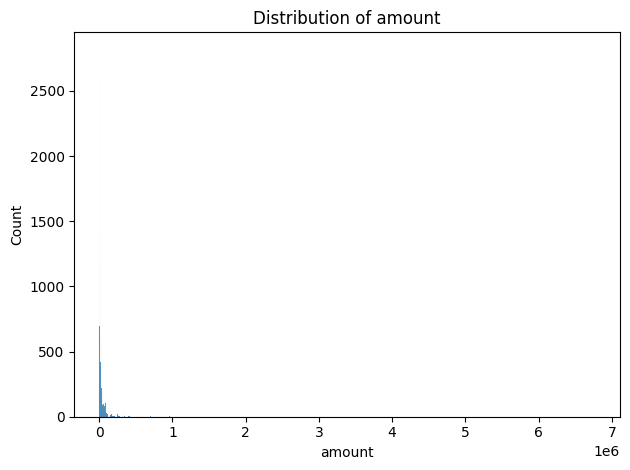

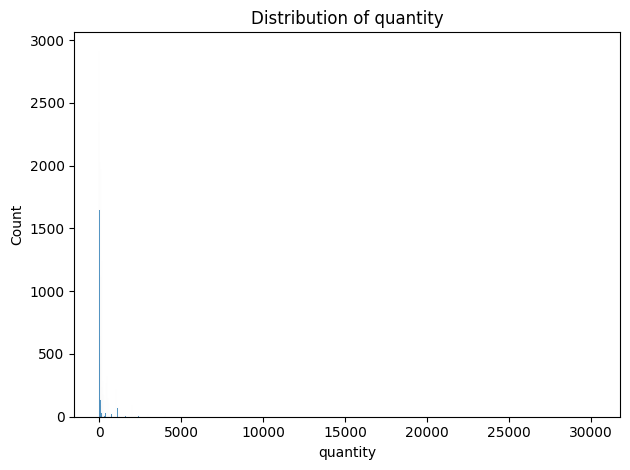

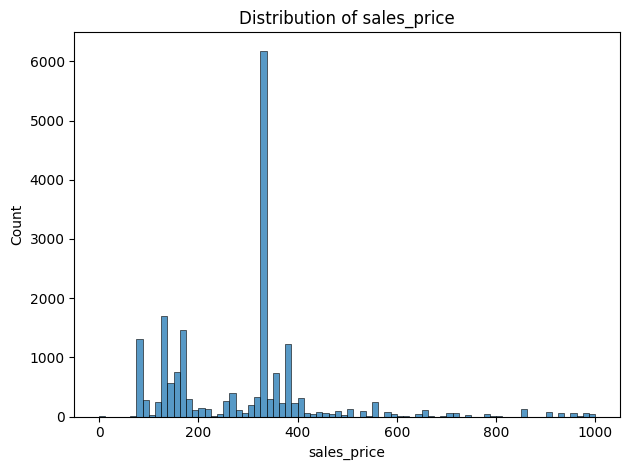

In [22]:
numeric_cols = df[["amount", "quantity", "sales_price"]]
for cols in numeric_cols:
  plot = sns.histplot(data = numeric_cols, x = cols)
  plot.set_title(f"Distribution of {cols}")
  plt.tight_layout()
  plt.show()

>#### 4.1.1 Average Monthly Quantity
In this section we shall evaluate and visualize the average monthly quantity sold, using a line plot and bar plot


In [23]:
#function for monthly average : Quantity sold, amount
import random
import calendar
def monthly_average(numerical_input):

    temp_df = df.copy()

    temp_df["Month"] = pd.Categorical(temp_df.index.month_name(), categories = list(calendar.month_name)[1:],
                                 ordered=True)

    #monthly_avg = df.resample('M').mean()
    monthly_avg = temp_df.groupby("Month")[numerical_input].mean().reset_index()

    palette = sns.color_palette("hls")
    random_color = random.choice(palette)
    random_color2 = random.choice(palette)

    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 12), sharey=True)

    sns.lineplot(data = monthly_avg, x = "Month", y = numerical_input, color = random_color,
                 marker = "o", label = "Line", ax = axes[0])

    axes[0].set_title(f"Monthly {numerical_input} - Lineplot", fontsize=22)
    axes[0].set_xlabel("Month", fontsize=20)
    axes[0].set_ylabel(numerical_input, fontsize=20)
    axes[0].tick_params(axis='both', labelsize=15, rotation=45)
    axes[0].grid(True)

    sns.barplot(data = monthly_avg, x = "Month", y = numerical_input, color = random_color2, ax = axes[1])

    axes[1].set_title(f"Monthly {numerical_input} - Barplot", fontsize=22)
    axes[1].set_xlabel("Month", fontsize=20)
    axes[1].set_ylabel(numerical_input, fontsize=20)
    axes[1].tick_params(axis='both', labelsize=15)
    axes[1].grid(True)

    figure.autofmt_xdate()

    plt.tight_layout()
    plt.show()

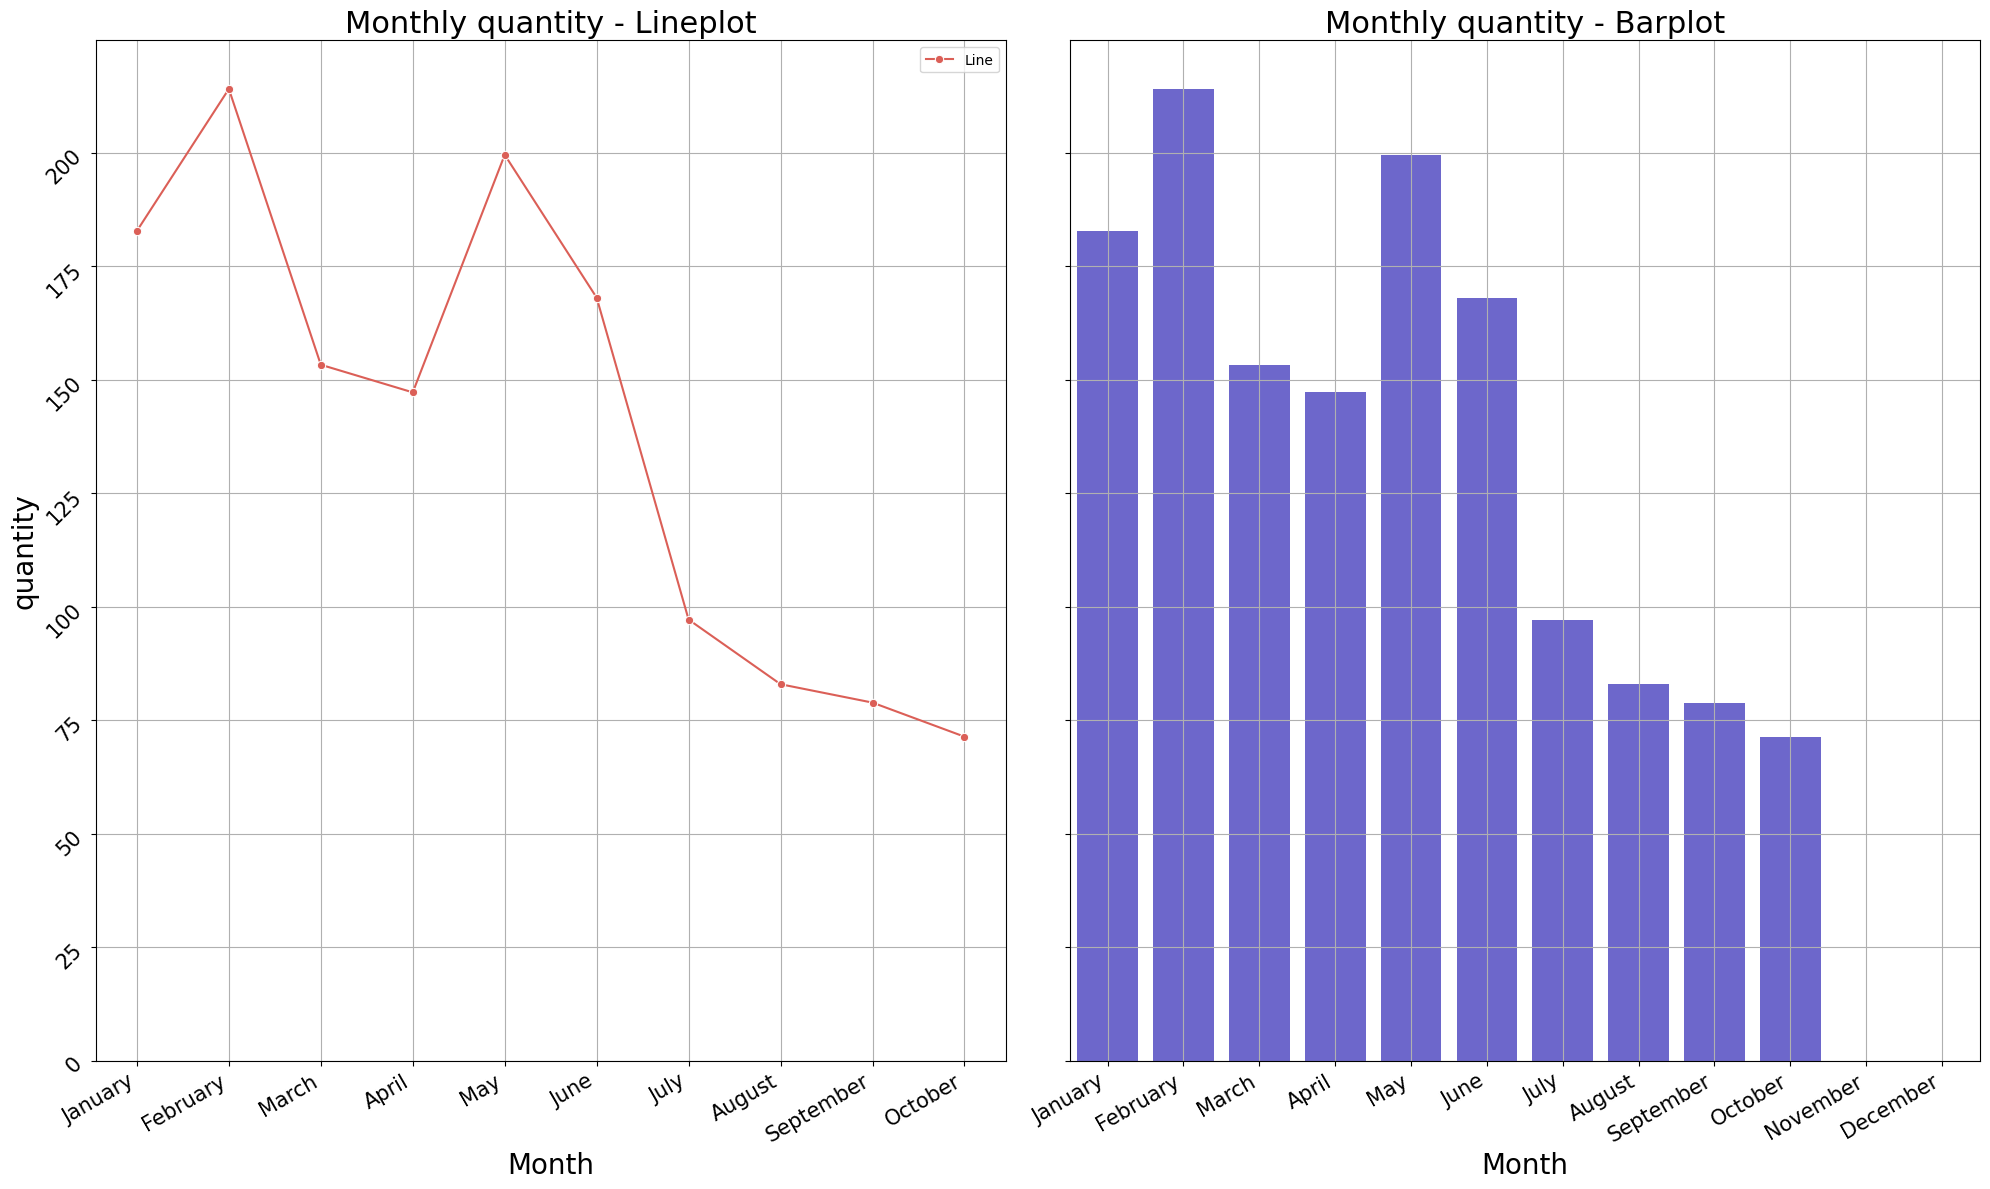

In [24]:
#evaluate average monthly quantity
monthly_average("quantity")

**Findings**
- February and May show noticeable spikes in sales, suggesting a surge in demand during these months.
- After May, there is a sharp decline in sales, which continues all the way through to October, indicating a period of lower demand or potential stock availability issues.
- The spikes could be due to specific seasonal promotions, product launches, or market trends in February and May.


>#### 4.1.2 Average Monthly Sales Amount
This code uses the `monthly_average` function to visualize the average sales amount for each month.


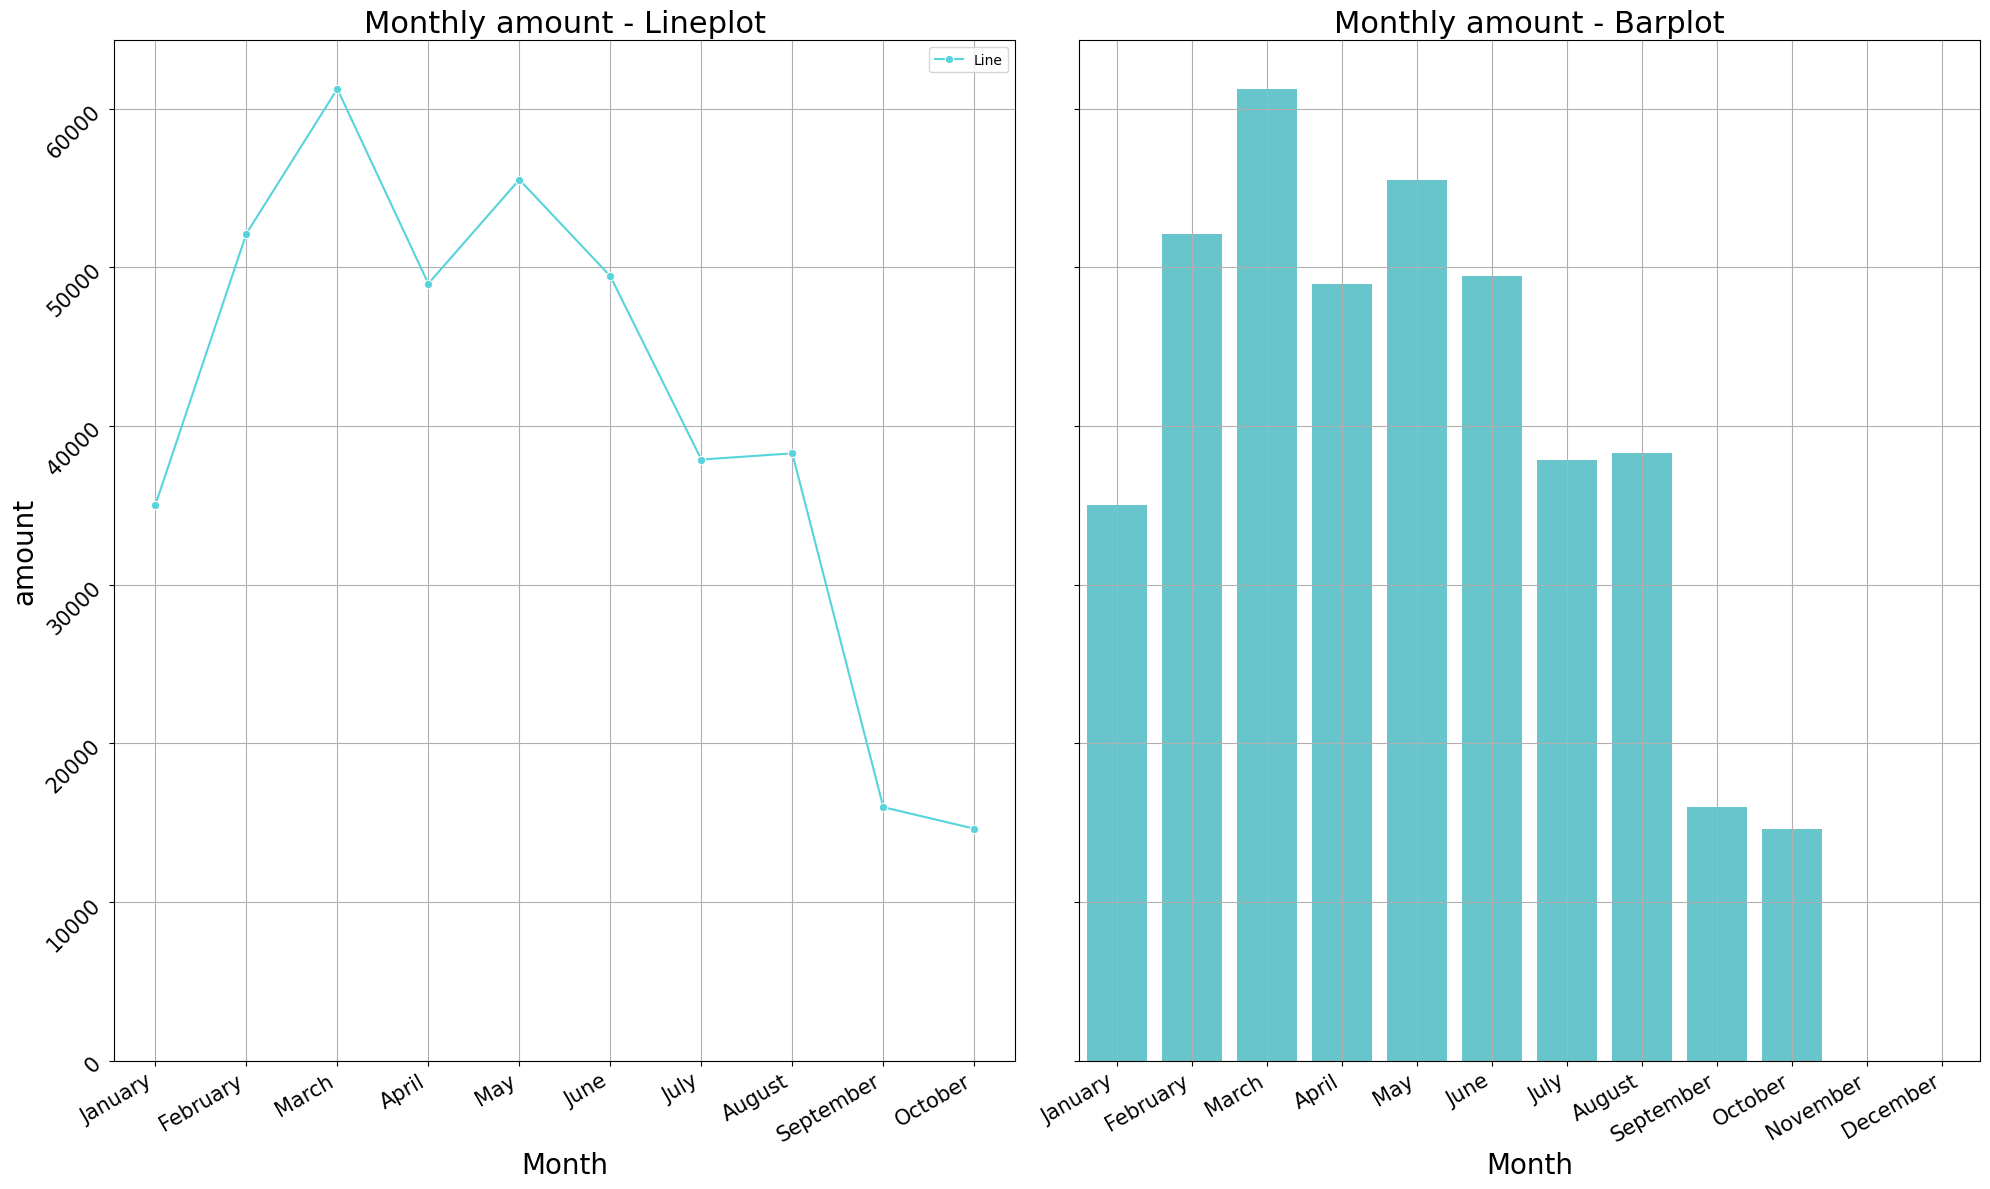

In [25]:
#plot average monthly sales amount
monthly_average("amount")

**Findings:**
- The average sales amount shows spikes in March and May, indicating possible seasonal demand or special events.
- Following May, the sales amount declines steadily through the year, reaching a low by October.
- These variations can be linked to changes in customer purchasing behavior, possibly due to external factors such as promotions, seasonality, or product availability.


>#### 4.1.2 Average Weekly Sales Amount and Quantity Sold
This code uses the `weekly_average` function to visualize the average sales amount for each week.


In [26]:
## Average Weekly

#average weekly sales vs average sales amount

#fucntion for weekly average : Quantity sold, amount
def weekly_average(numerical_input):

    temp_df = df.copy()

    #weekly_avg = df.resample('W').mean()
    temp_df["Week"] = temp_df.index.isocalendar().week
    weekly_avg = temp_df.groupby("Week")[numerical_input].mean().reset_index()

    palette = sns.color_palette("Set1")
    random_color = random.choice(palette)

    fig, ax = plt.subplots(figsize = (15,10))

    sns.lineplot(data = weekly_avg, x = 'Week', y = numerical_input, color = random_color, ax = ax, marker = 'o')
    ax.set_title(f'Weekly sales {numerical_input}', fontsize=22)
    ax.set_xlabel('Week', fontsize=20)
    ax.set_ylabel(f'{numerical_input}', fontsize=20)

    ax.tick_params(axis='both', labelsize=15)

    #make x axis labels more readable i.e prevent overlapping on x-axis
    fig.autofmt_xdate()
    #plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#df.resample(rule = 'W').mean()["quantity"].plot(kind='bar', figsize=(15,6))


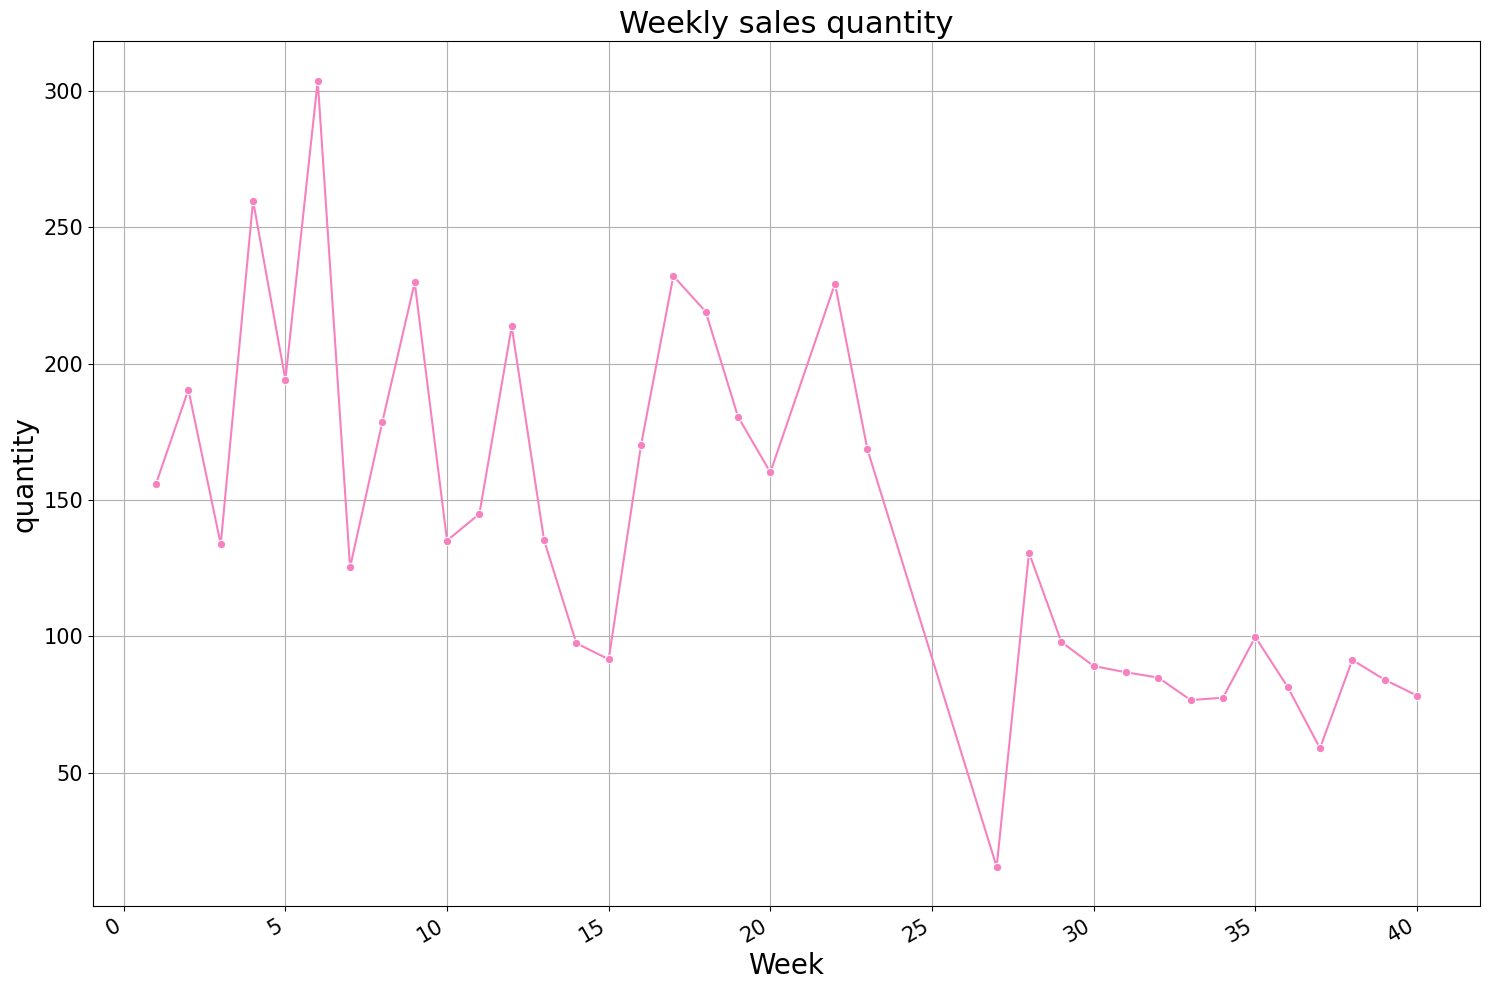

In [27]:
weekly_average("quantity")

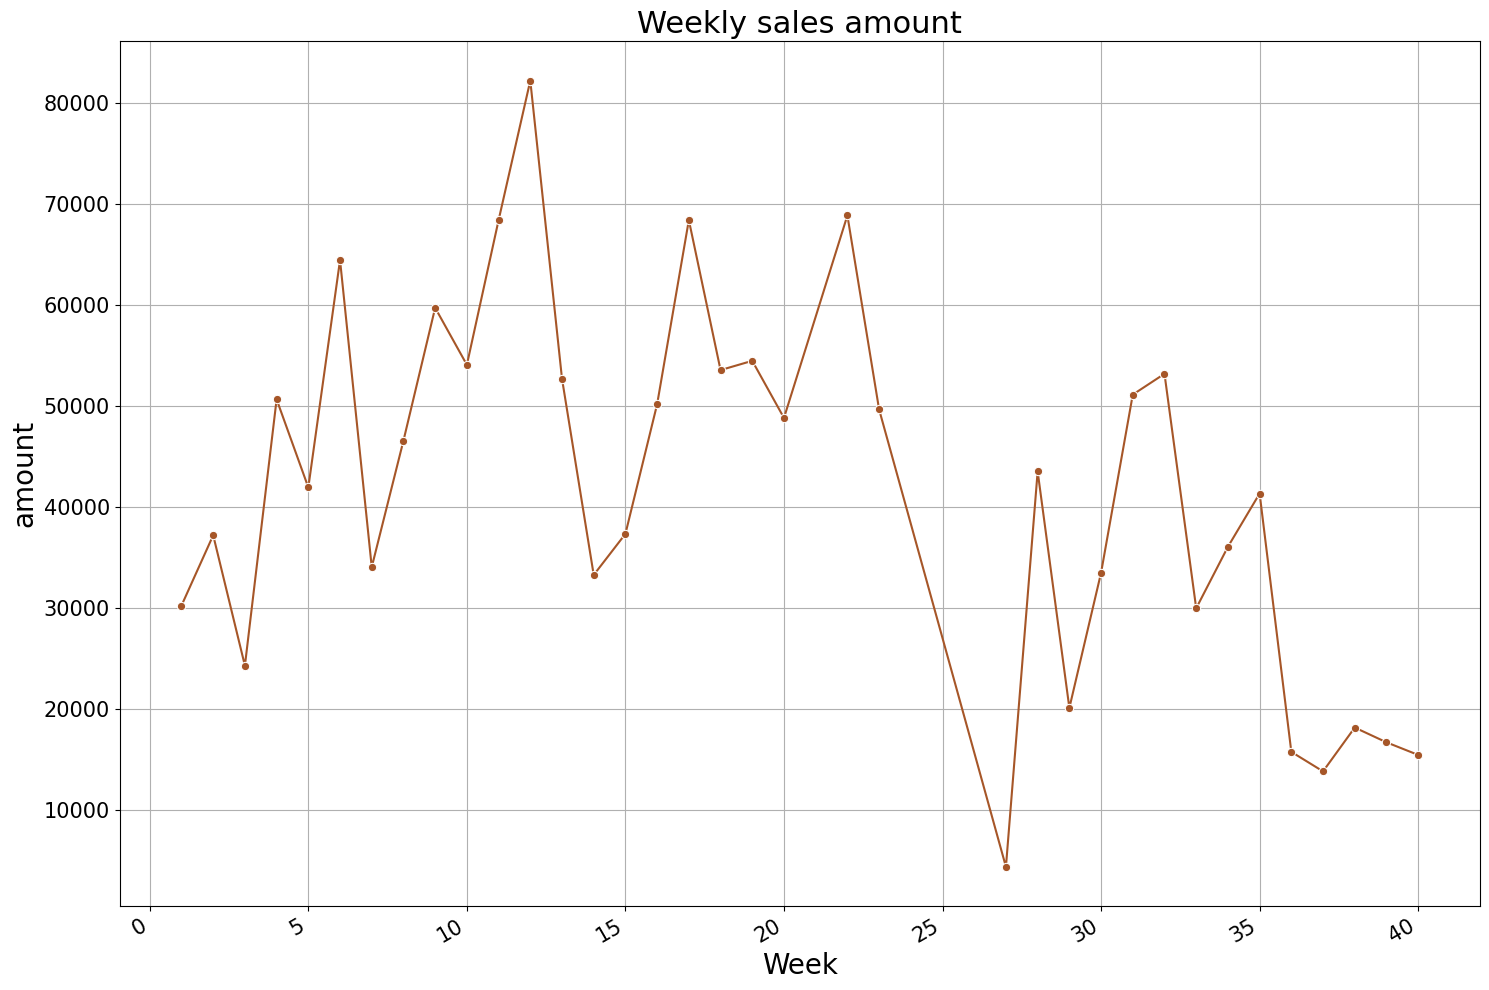

In [28]:
weekly_average("amount")

**Findings:**
- The average weekly sales amount shows spikes between weeks 5 and 15, indicating possible seasonal demand or special events.
- A steep negative slope is evident after week 20 indicating a decline in sales quantity. This is also complemented by the weekly sales quantity which follows the same trend as for the weekly sales amount
- Such variations could be due to lack of products in the market resulting in the decrease of quantity sold whic in turn leads to a low weekly average sales amount between weeks 20 to 27


>#### 4.1.3 Average Daily Sales Amount and Quantity Sold
This code uses the `daily_average` function to visualize the average sales amount for each week.


In [29]:
def daily_average(numerical_input, days_back=None):
    temp_df = df.copy()

    # Filter to recent days
    if days_back is not None:
        temp_df = temp_df.last(f"{days_back}D")
    daily_avg = temp_df.select_dtypes(include=['number']).resample('D').mean()



    palette = sns.color_palette("deep")
    random_color = random.choice(palette)

    fig, ax = plt.subplots(figsize=(15, 8))

    sns.lineplot(data=daily_avg, x=daily_avg.index, y=numerical_input, color=random_color, ax=ax)

    ax.set_title(f'Daily Sales {numerical_input} - Last {days_back} Days' if days_back else f'Daily Sales {numerical_input} - Full Data', fontsize=22)
    ax.set_xlabel('Date', fontsize=20)
    ax.set_ylabel(numerical_input, fontsize=20)
    ax.tick_params(axis='both', labelsize=14)
    fig.autofmt_xdate()

    plt.grid(True)
    plt.tight_layout()
    plt.show()


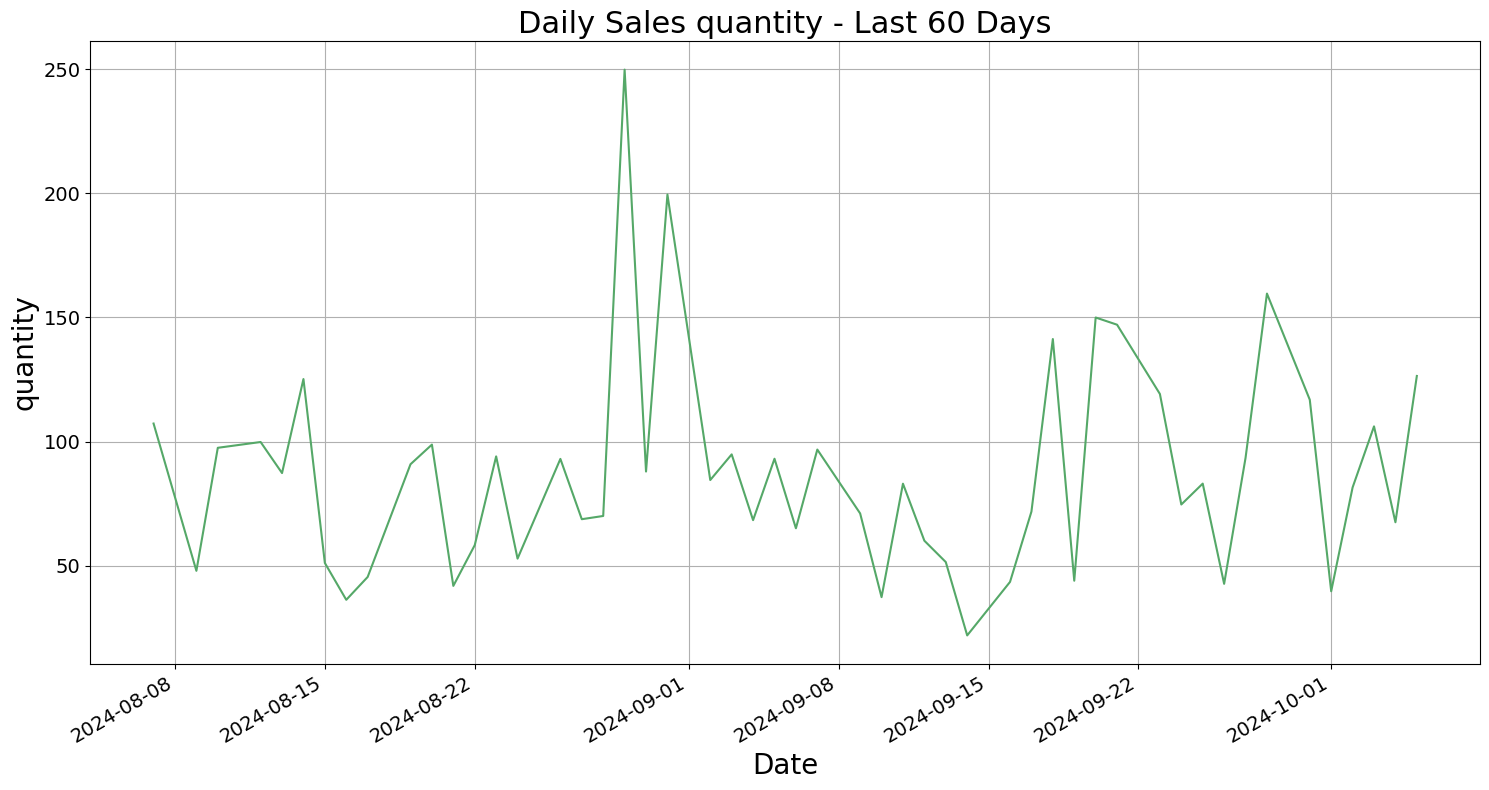

In [30]:
daily_average("quantity", days_back = 60)

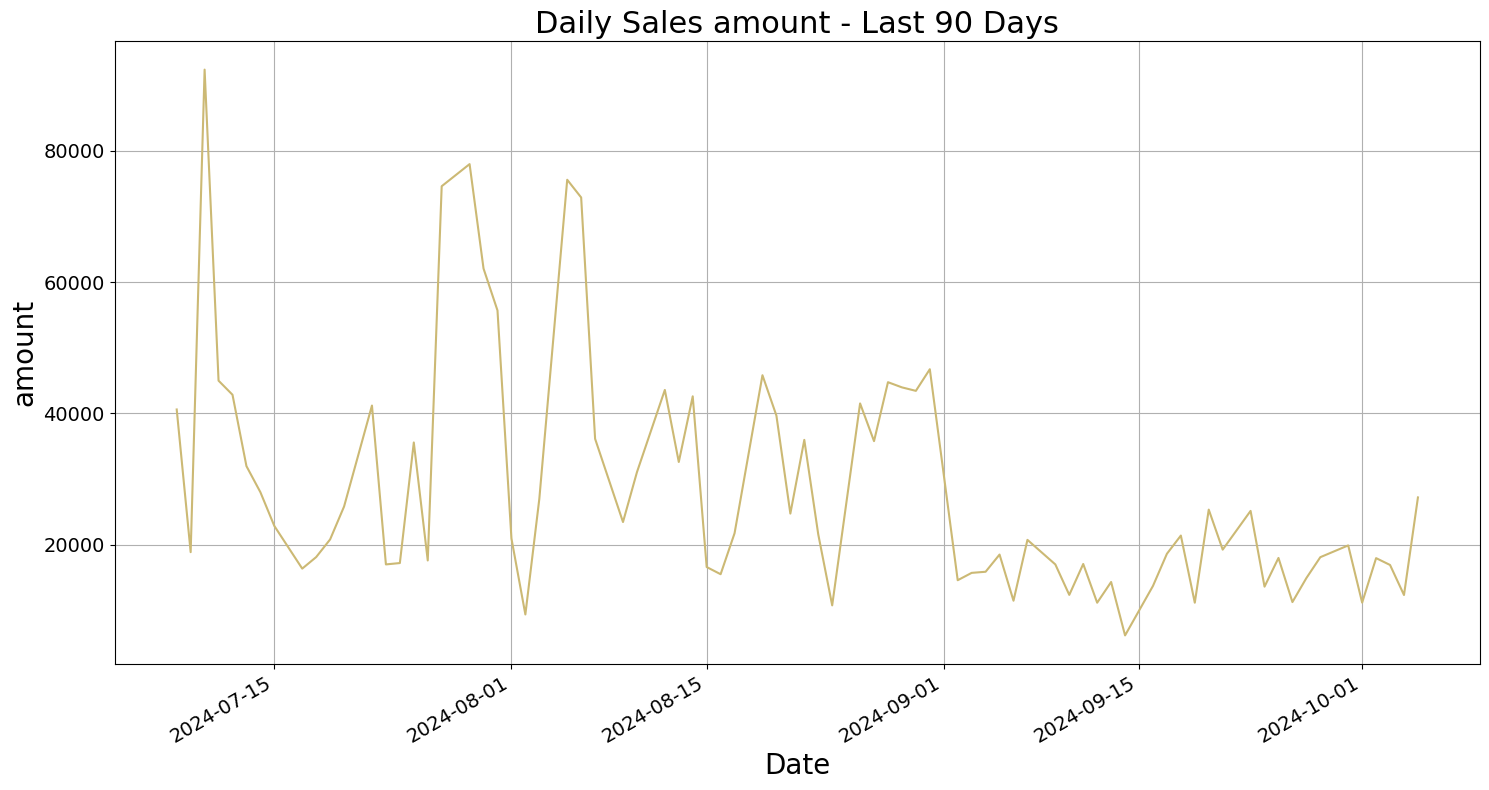

In [31]:
daily_average("amount", days_back = 90)

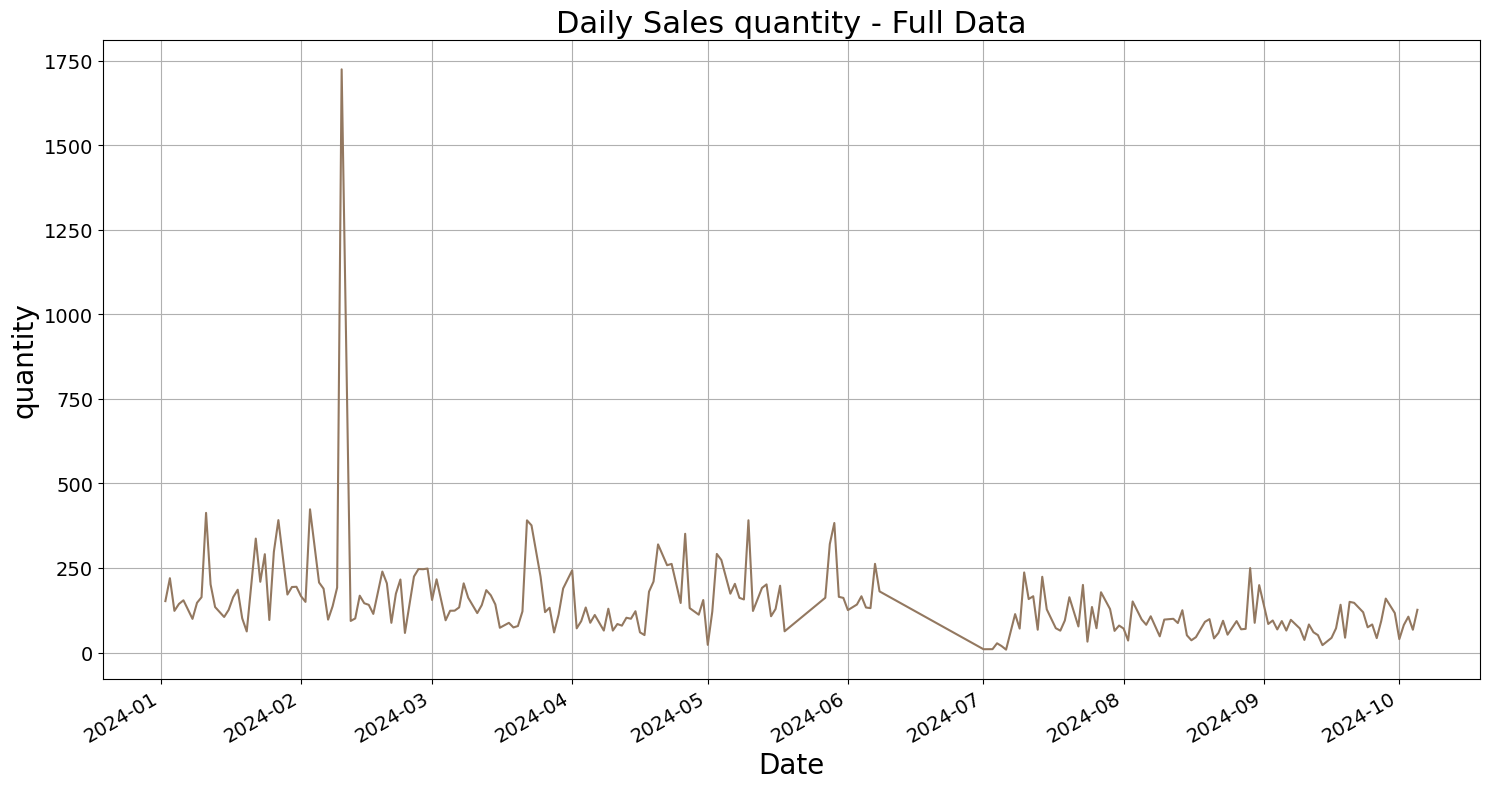

In [32]:
daily_average("quantity")

Below is a graph for the daily TOTAL quantity of goods sold with a 7 day rolling mean


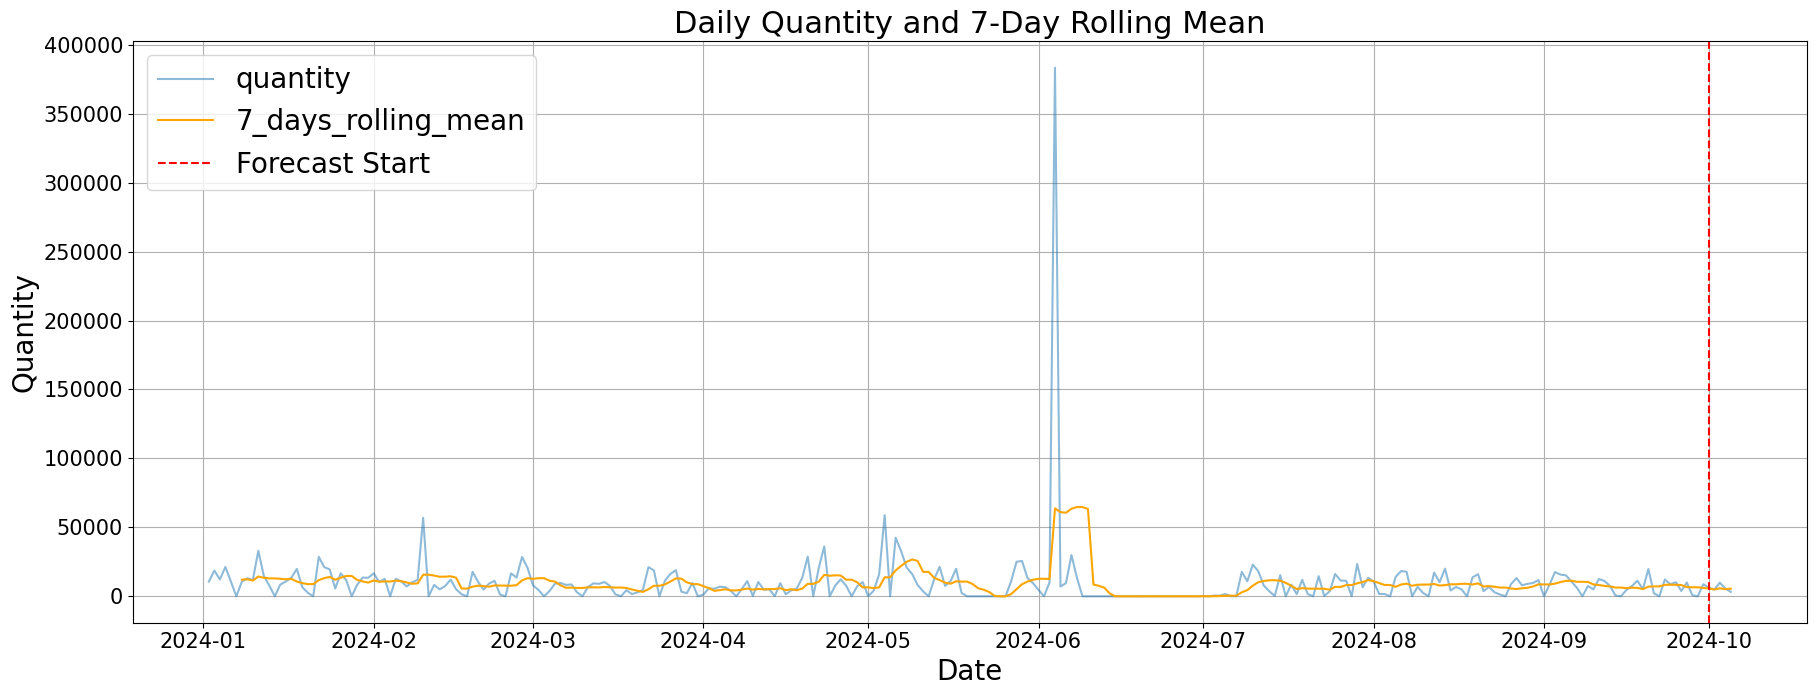

In [33]:
# Full range of dates
temp_df =df.copy()
full_range = pd.date_range(start=temp_df.index.min(), end=temp_df.index.max(), freq='D')

# Reindex to include all dates, filling missing with 0
daily_quantity = temp_df["quantity"].resample('D').sum().reindex(full_range, fill_value=0)

# Compute rolling mean again
rolling_mean = daily_quantity.rolling(window=7).mean()


import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
plt.plot(daily_quantity.index, daily_quantity, label='quantity', alpha=0.5)
plt.plot(rolling_mean.index, rolling_mean, label='7_days_rolling_mean', color='orange')
plt.axvline(pd.to_datetime('2024-10-01'), color='r', linestyle='--', label='Forecast Start')
plt.legend(fontsize=20)
plt.title('Daily Quantity and 7-Day Rolling Mean', fontsize=22)
plt.ylabel('Quantity', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.grid(True)
plt.tight_layout()
#plt.yscale('log')
plt.tick_params(labelsize=15)
plt.show()


**Findings**
- It is evident there is an abnormal spike in the data in the month of June which may be an outlier or a sale that is legitimate. The sale may involve a wholesale customer who bought goods in bulk
- The average daily sales sales quantity from January to October falls between 0 and 50000 units throughout the time period
- There are no seasonal/cyclic patterns observed throughout the dataset


>####  4.1.4 Total Daily Sales Trend
We plot a graph to show the movement of total daily sales across the year, from January to September and indicate where our Forecasting is to start


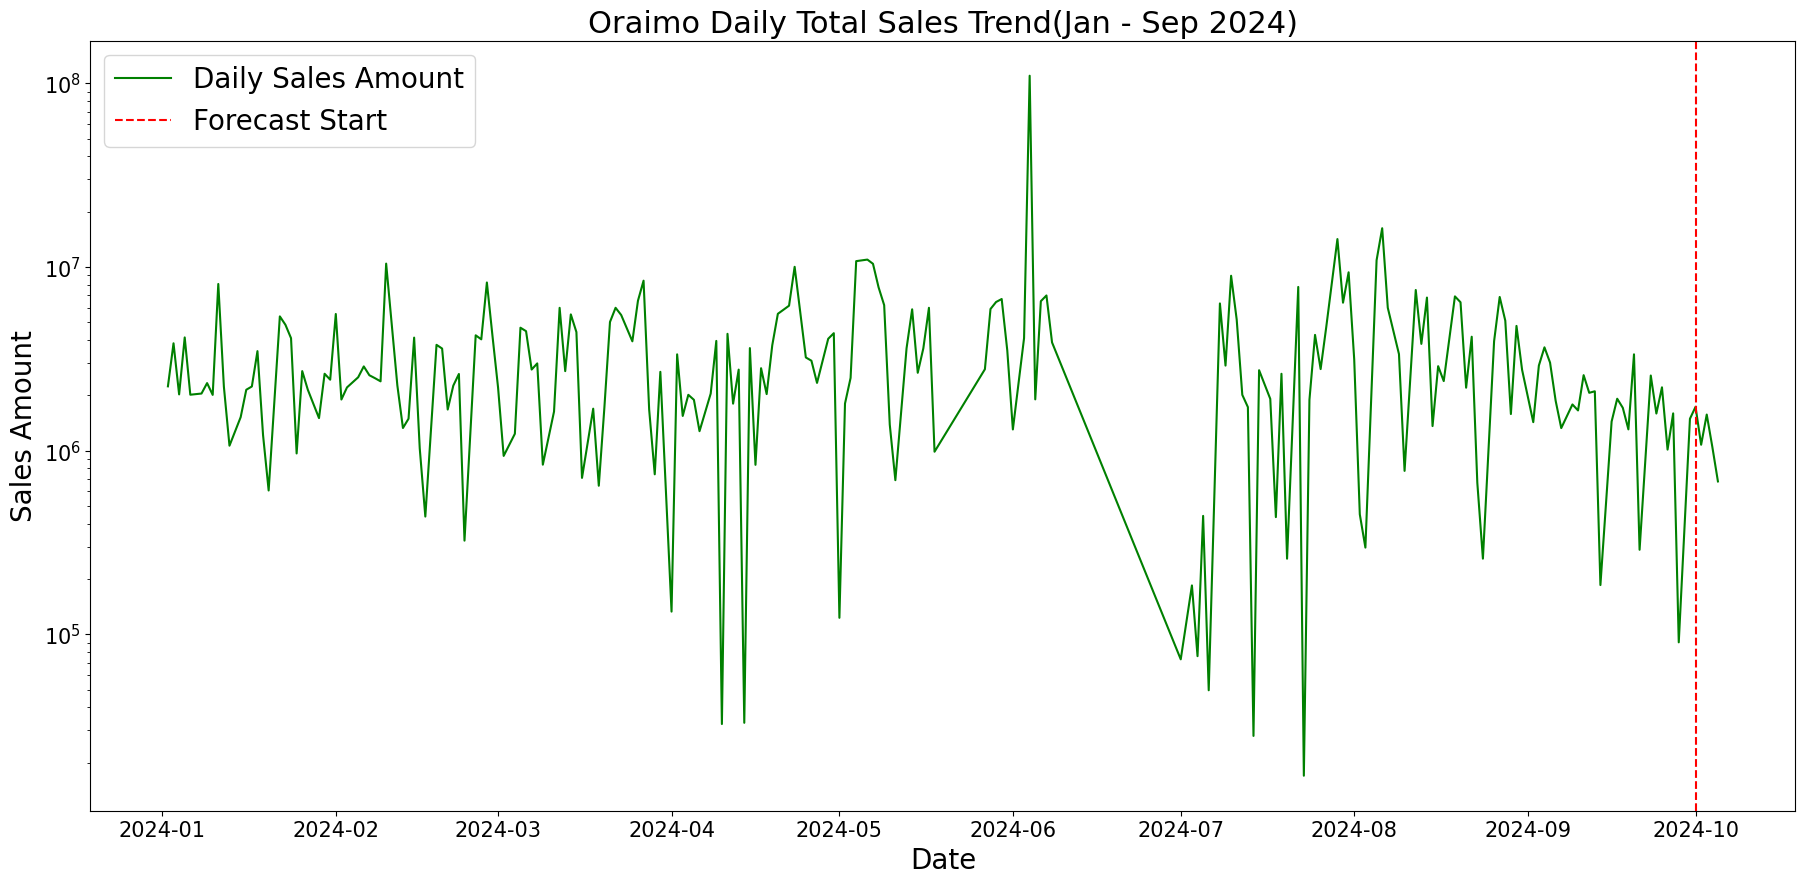

In [34]:
## Total Daily Sales Trend

# Plot sales trend
daily_sales = df.groupby(df.index.date)['amount'].sum().rename("total_sales")
daily_sales.index = pd.to_datetime(daily_sales.index)

plt.figure(figsize=(22,10))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales Amount', color = "green")
plt.axvline(pd.to_datetime('2024-10-01'), color='r', linestyle='--', label='Forecast Start')
plt.title('Oraimo Daily Total Sales Trend(Jan - Sep 2024)', fontsize=22)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Sales Amount', fontsize=20)
plt.yscale('log')
plt.tick_params(labelsize=15)
plt.legend(fontsize=20)
plt.show()

**Findings:**

-  Forecasting stating point is indicated from October 2024
- There is a significant daily fluctuation in sales amounts throughout the period indicating there are no seasonal/cyclic patterns


>#### 4.1.5 Best and Worst Selling Products  
The plots below shows the top 10 best selling products across the market followed by the worst selling


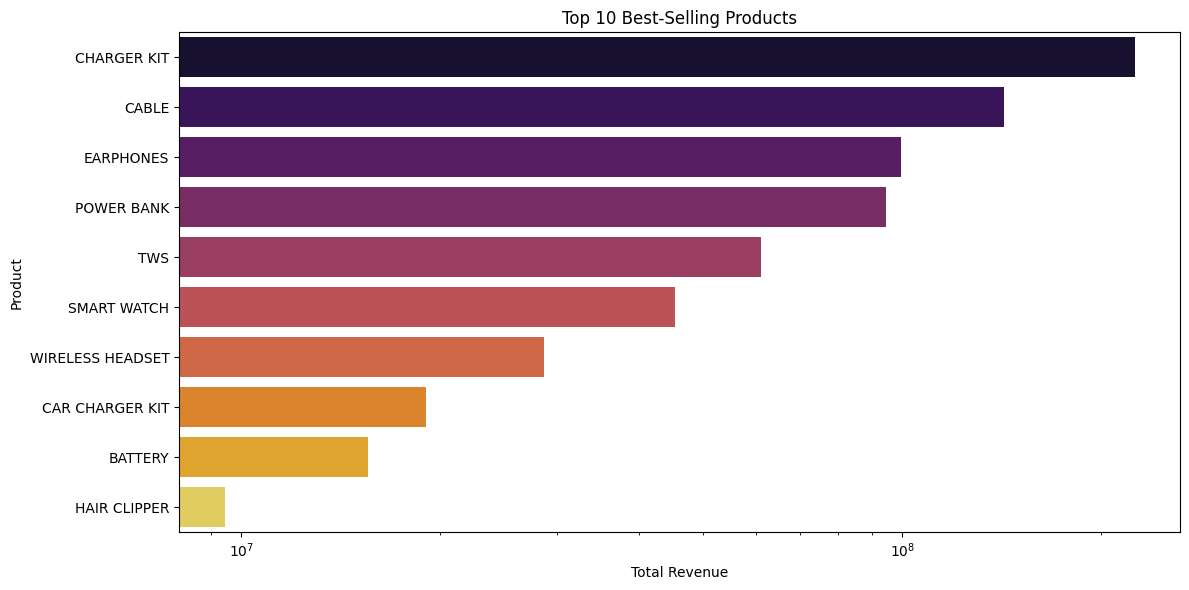

In [35]:
#best selling
product_sales = df.groupby("product_type")["amount"].sum().sort_values(ascending = False)

#top 10 best selling/fast-moving product categories in terms of quantity sold
top_10_products = product_sales.head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = top_10_products.values, y = top_10_products.index, palette = "inferno")
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.xscale('log')
#plt.xlim(0, 100000)
plt.tight_layout()
plt.show()

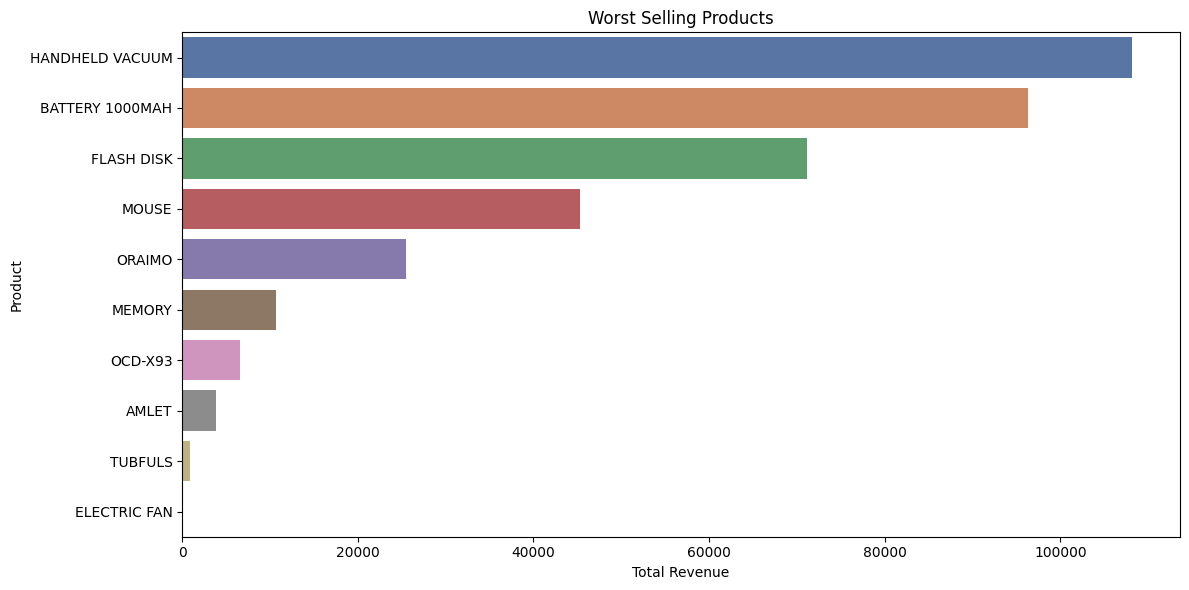

In [36]:
#worst selling
bottom_10_products = product_sales.tail(10)
plt.figure(figsize = (12,6))
sns.barplot(x = bottom_10_products.values, y = bottom_10_products.index, palette = "deep")
plt.title('Worst Selling Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
#plt.xscale('log')
#plt.xlim(0, 100000)
plt.tight_layout()
plt.show()

**Findings:**
- The best selling products are Chargers, earphones and cables
- Worst selling products include goods such as Electric fans
- The plot also indicates that Power Devices  and Audio Devices should be our most stocked goods


>#### 4.1.6 Most Common Products
The plot below shows the most common products sold


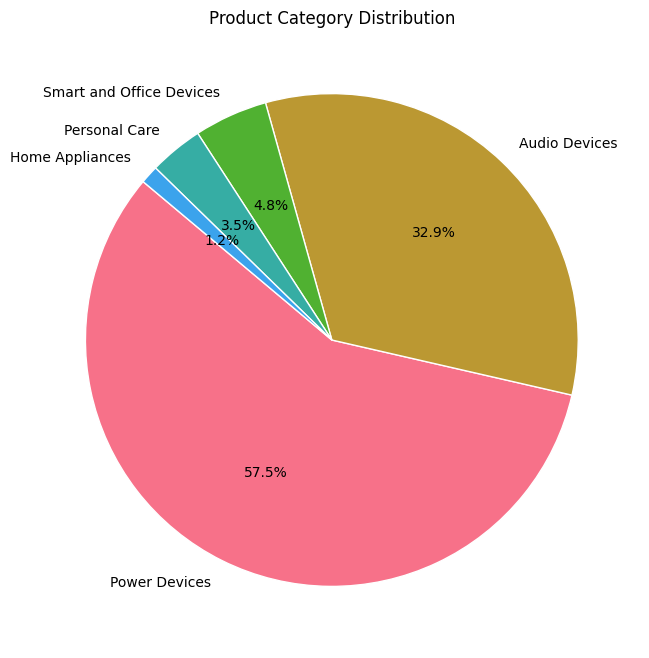

In [37]:
categories_performance = df['product_category'].value_counts()
categories_performance = categories_performance[categories_performance.index != 'Unknown']
percentages = (categories_performance / categories_performance.sum()) * 100

colors = sns.color_palette('husl')

plt.figure(figsize=(8, 8))
plt.pie(categories_performance,
        labels=categories_performance.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()

**Findings:**
- The most popular category is the Power Devices category Containing goods such as Chargers and Power Cables
- 32.9% of the goods are the Audio Devices category including products such as Earphones
- Home appliances are the east popular occupying less than 2% of the products in the market


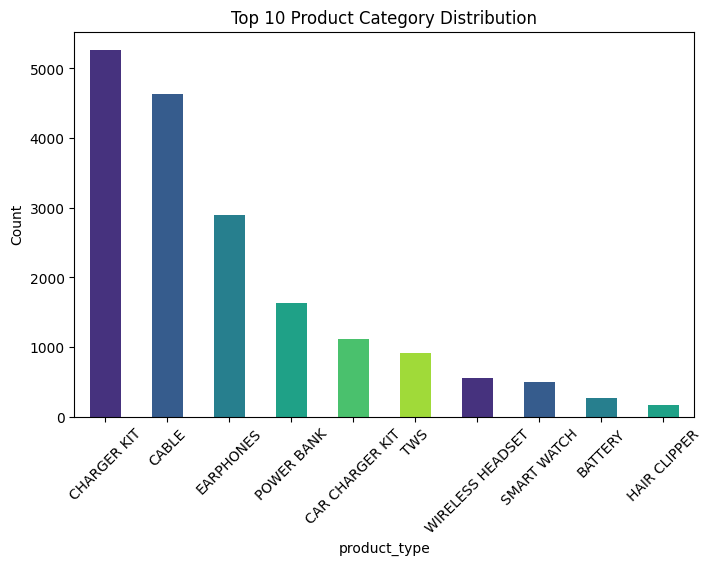

In [38]:
#top 10 product category distribution
##most common products being sold

top_10_distribution = df['product_type'].value_counts().head(10)
colors = sns.color_palette('viridis')
top_10_distribution.plot(kind='bar', title='Top 10 Product Category Distribution',
                         figsize=(8,5), color = colors)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Findings:**
- The most popular product across the country is the Charger Kit and the Cable which is in the Power Devices category
- Earphones follow next and are present in the Audio Devices Category which was about 32% of the producs in the market


>### 4.1.7 Average Daily Sales per Day of the Week
We evaluate the average sales per individual days of the week i.e Monday, Tuesday, Wednesday ... etc


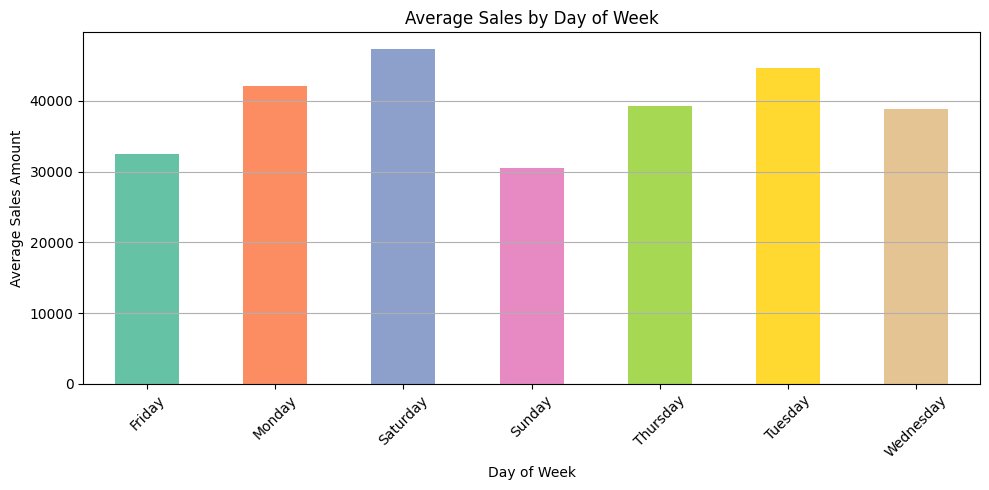

In [39]:
#AVERAGE SALES PER DAY OF THE WEEK
temp_df = df.copy()

temp_df["day"] = temp_df.index.day_name()
weekly_avg = temp_df.groupby("day")["amount"].mean()

#plot
colors = sns.color_palette('Set2')
plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color=colors)
plt.title('Average Sales by Day of Week')
plt.ylabel('Average Sales Amount')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Findings:**
- Saturdays have the highest foot traffic where average sales across the week is highest
- Sundays have the lowest average sales
- A spike is noticed from Mondays through to Thursday where sales drop on Fridays and spike up on Saturdays
- The best perfoming weekend day is Saturday
- Weekend sales are higher than weekdays


### 4.2 Bivariate Analysis
Bivariate analysis involves examining the relationship between two variables to understand how one may affect the other.


>#### 4.2.1 Weekday vs Weekend Sales
This analysis compares average sales between weekends and weekdays.


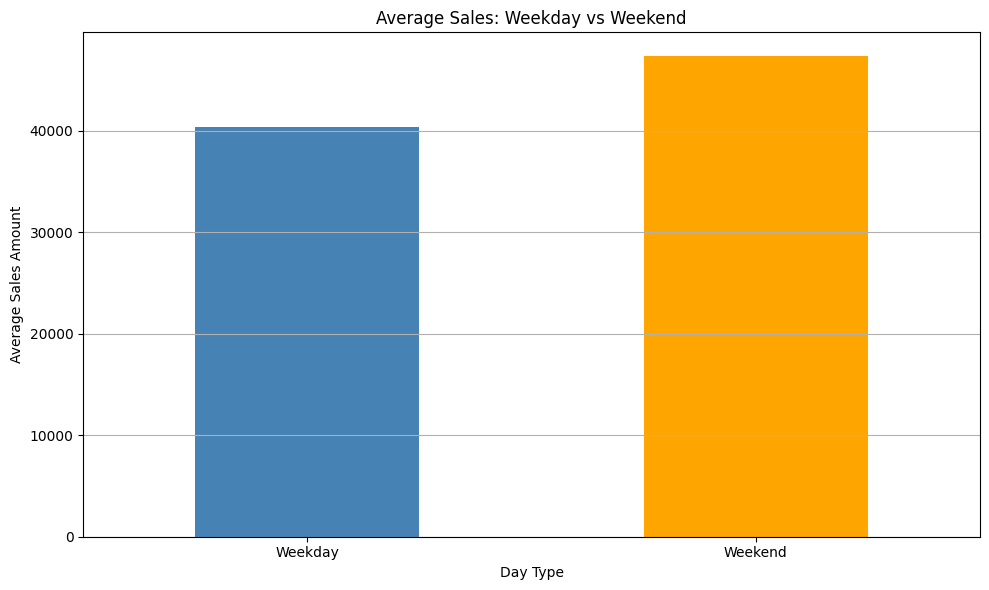

In [40]:
# Add Weekend Flag -> This distinguishes weekends from weekdays.
temp_df = df.copy()

temp_df['day_of_week'] = temp_df.index.day_name()
temp_df['is_weekend'] = temp_df['day_of_week'].isin(['Saturday', 'Sunday'])
temp_df['day_type'] = temp_df['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Groups by day type and calculate average sales
summary = temp_df.groupby('day_type')['amount'].mean()

# Plot the bar chart
summary.plot(kind='bar', color=['steelblue', 'orange'], figsize=(10, 6))
plt.title("Average Sales: Weekday vs Weekend")
plt.ylabel("Average Sales Amount")
plt.xlabel("Day Type")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Findings:**
- Weekend sales are higher than weekday sales, as shown by the average sales amount comparison.
- This suggests that customers are likely spending more on weekends, possibly due to higher foot traffic, more promotional activities, or people having more free time to shop.
- The difference in sales could be leveraged for planning inventory, staffing and marketing strategies to maximize sales during weekends.


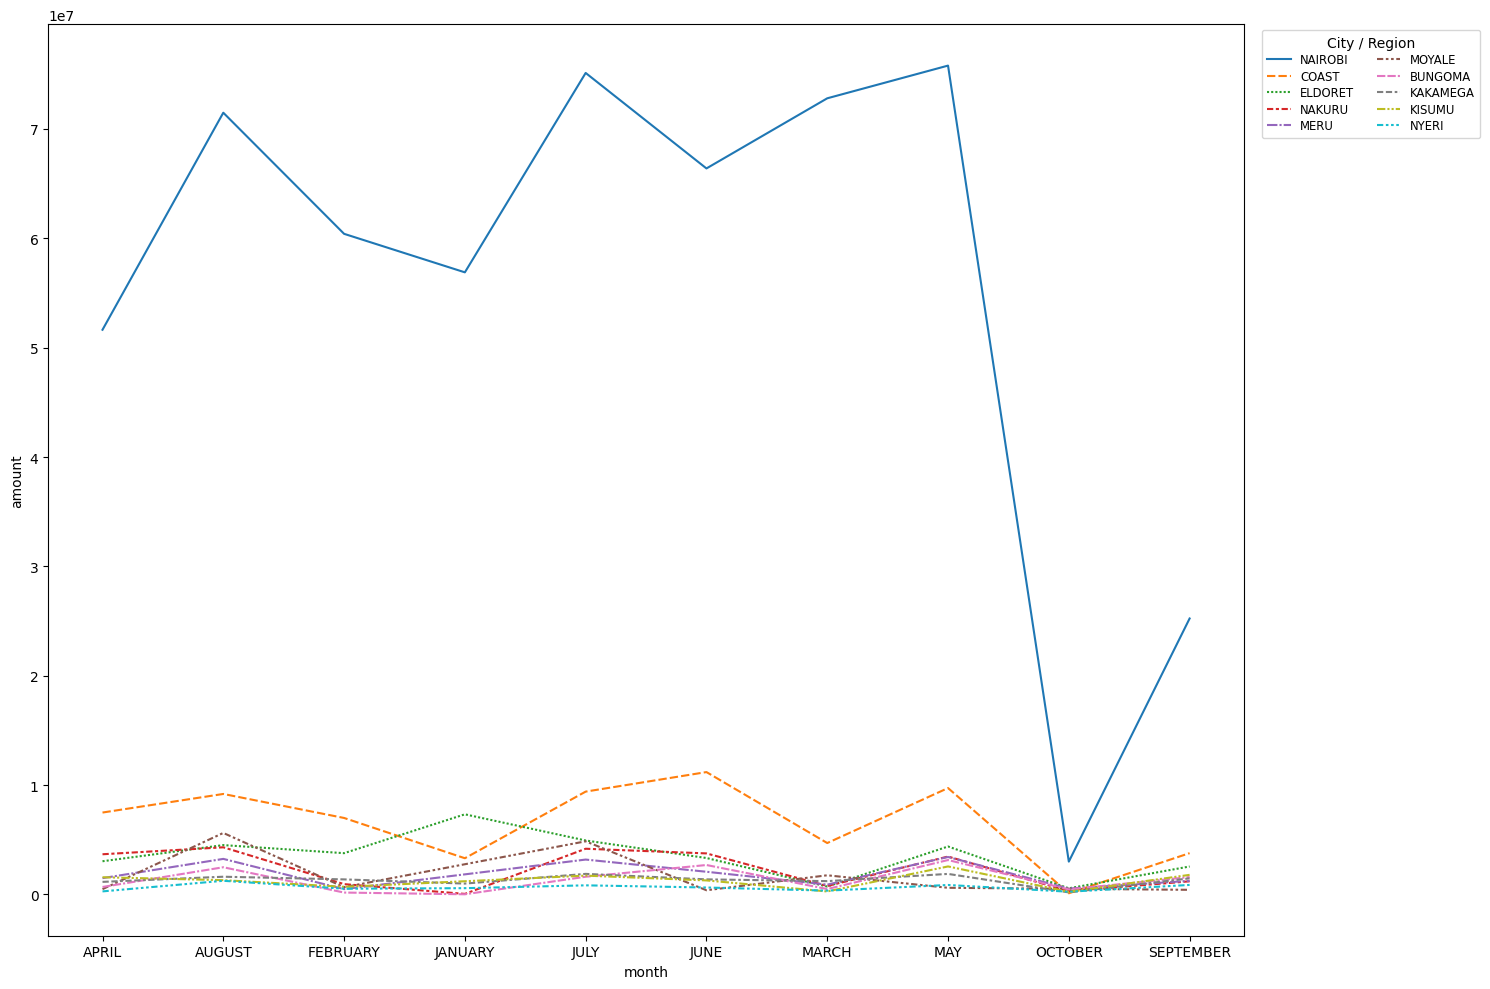

In [41]:
salescity = df.groupby(["month", "city"])['amount'].sum().unstack()

# Get the top 10 cities by total sales
top_10_cities = df.groupby('city')['amount'].sum().nlargest(10).index

# Filter salescity to include only the top 10 cities
salescity = salescity[top_10_cities]

# Create the line plot
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=salescity)  # Assign the plot to 'ax'
plt.ylabel('amount')

# Customize the legend
leg = ax.legend(
    title='City / Region',
    loc='upper left',
    bbox_to_anchor=(1.01, 1),
    ncol=2,
    fontsize='small',
    title_fontsize='medium',
    frameon=True,
    fancybox=True,
    borderpad=0.5,
    labelspacing=0.3
)

# Draw plot with tight layout
plt.tight_layout()

plt.show()

>#### 4.2.2 Sales Price vs Quantity Sold
This analysis investigates the relationship between sales price and quantity sold, with amount (total sales revenue) used as an additional variable


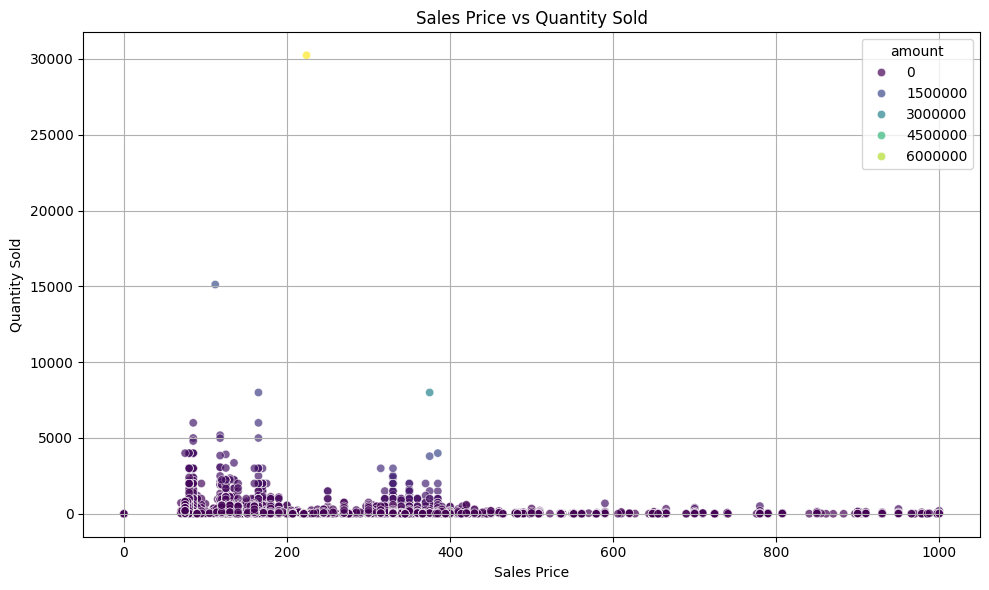

In [42]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "sales_price", y = "quantity", hue = "amount", palette = "viridis", alpha = 0.7)
plt.title("Sales Price vs Quantity Sold")
plt.xlabel("Sales Price")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

**Findings:**                                                                                                                   
- Most Sales Occur at Lower Price Points: The majority of the data points are clustered on the left side of the plot, indicating that most products are sold at relatively lower price points. This suggests that the customer base is more responsive to lower pricing, implying a potential opportunity for targeting price-sensitive customers.
- Quantity Sold is Generally Low: Most data points are concentrated near the bottom of the y-axis, representing low quantities sold.
- Few High Outliers: A few significant outliers can be identified, such as one product that sold approximately 30,000 units at a price under 200, marked yellow in the scatter plot, indicating it generated the highest amount.
- “Amount” Metric is Strongest in Outliers: The yellow points represent high amounts, which are typically associated with high-volume sales at lower or mid-price points.This suggests that the most impactful sales (in terms of revenue) come from a few high-volume, lower- or mid-priced products, potentially driven by bulk purchases or successful marketing campaigns.
                                


>#### 4.2.3 Correlation Analysis of Numeric Variables
This heatmap shows the correlation between `quantity`, `sales_price` and `amount`. The values range from -1 to 1.


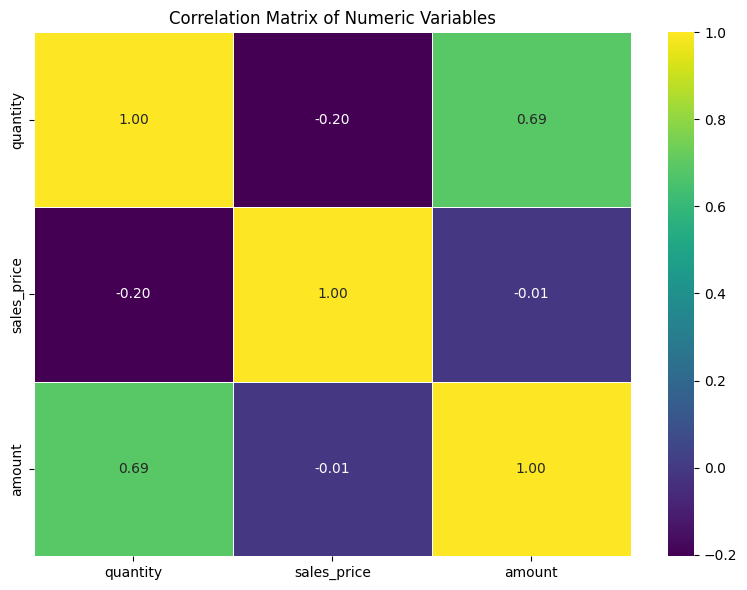

In [43]:
# Select numeric columns for correlation
numeric_cols = ['quantity', 'sales_price', 'amount']
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

**Findings**
- Quantity and Amount: A moderate positive correlation of 0.69 suggests that as quantity sold increases, the total amount (sales value) also tends to increase.
- Quantity and Sales Price: A weak negative correlation of -0.20 indicates that higher quantities are not strongly associated with higher sales prices.
- Sales Price and Amount: A very weak negative correlation of -0.01 suggests that there is virtually no relationship between sales price and the total amount.


>#### 4.2.4 Monthly vs Day-of-Week Sales Heatmap
This heatmap explores how sales amount varies across days of the week and months.
It allows for quick identification of patterns, such as consistently high or low sales on certain days or in specific months.


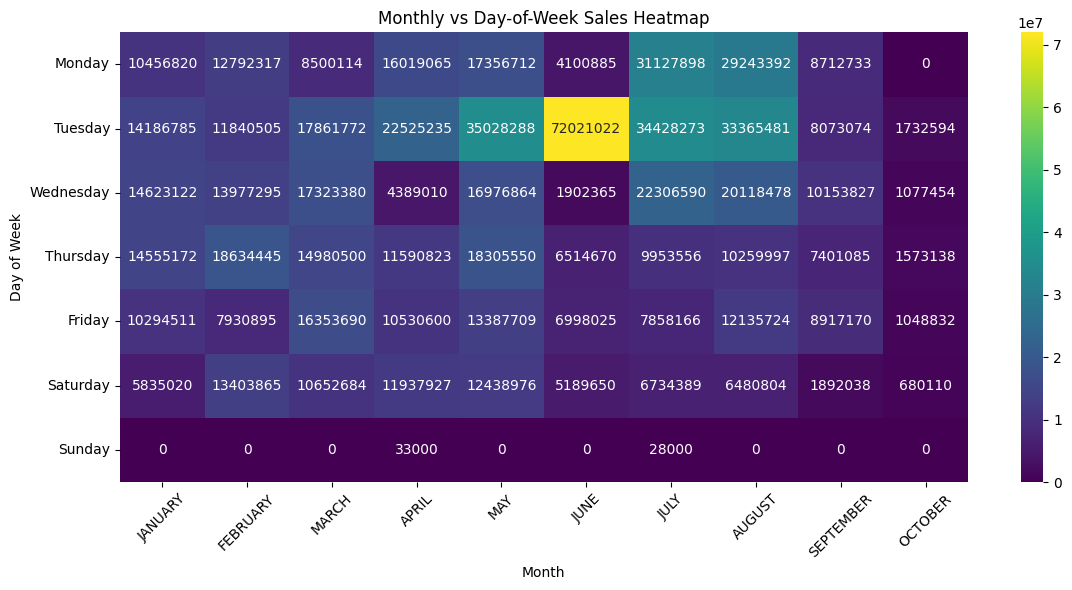

In [44]:
# Define the correct month order
month_order = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE',
               'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER']

# Ensure 'month' column is ordered correctly
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Extract day of week from index (date)
df['day_of_week'] = df.index.day_name()

# Create pivot table: sum of sales amount by day and month
heatmap_data = df.pivot_table(
    values='amount',
    index='day_of_week',
    columns='month',
    aggfunc='sum'
)

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(index=day_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis")
plt.title("Monthly vs Day-of-Week Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Findings**
- High activity is observed on Tuesdays and Mondays, suggesting strong beginning-of-week demand.
- June recorded the highest sales, possibly indicating promotional campaigns or seasonal demand spikes.
- Lower sales on Sundays and Saturdays may reflect reduced business activity or customer engagement on those days


### 4.3 Multivariate Analysis
Multivariate analysis involves examining more than two variables at the same time to understand patterns, relationships, or structures in the data.


>#### 4.3.1 Dimensionality Reduction with PCA
We are using PCA to shrink our data from 3 numeric columns (amount, quantity and sales_price) down to 2 new columns (pca1 and pca2). This helps us visualize complex data in just two dimensions


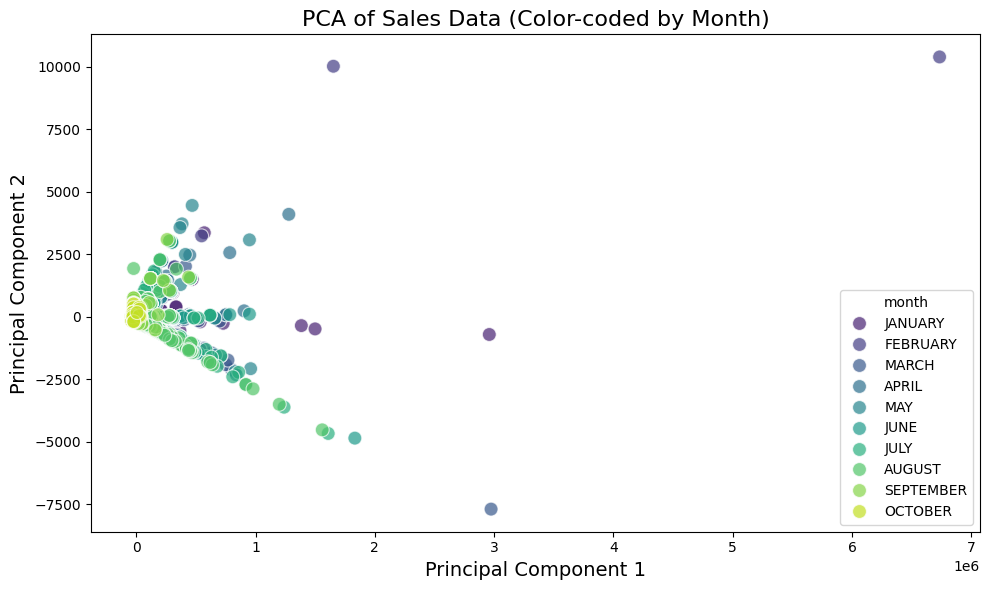

In [45]:
from sklearn.decomposition import PCA

# Selecting relevant features for PCA
pca_features = df[['amount', 'quantity', 'sales_price']]

# Apply PCA
pca = PCA(n_components=2)  # Reduce to two components for visualization
pca_components = pca.fit_transform(pca_features)

# Add the PCA components to the dataframe
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]


# Plotting PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', data=df, hue='month', palette='viridis', s=100, alpha=0.7)

# Title and labels
plt.title('PCA of Sales Data (Color-coded by Month)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


**Findings**
- Cluster near origin: Most sales data points cluster around the center, indicating consistent patterns across months (e.g. similar prices and quantities sold).
- Dispersed months: January and February show wider spread, likely due to seasonal demand or promotions.
- Seasonal clusters: May and September stand out, possibly marking peak periods with higher sales or pricing changes.
- PC1 spread: Principal Component 1 captures major variance—likely tied to quantity sold or sales price shifts


### Dickey Fuller Test(Adf Test)
- It is a statistical test used to check for stationarity in a time series.

- It helps to figure out whether a time series has a unit root — meaning it is non-stationary (its statistical properties like mean and variance change over time).

- Stationarity is a key assumption for many time series models like ARIMA.

 Null hypothesis (H₀): The series has a unit root → it is non-stationary

- Alternative hypothesis (H₁): The series is stationary (no unit root)
is low (commonly < 0.05), you reject H₀ and conclude the series is stationary.
If the p-value is low (commonly < 0.05), you reject H₀ and conclude the series is stationary.


In [46]:
daily_sales = df['amount'].resample('D').sum().to_frame().rename(columns={'amount': 'daily_amount'})

In [47]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on daily sales
result = adfuller(daily_sales['daily_amount'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

if result[1] <= 0.05:
    print("=> The series is stationary (reject the null hypothesis).")
else:
    print("=> The series is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -15.719837
p-value: 0.000000
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572
=> The series is stationary (reject the null hypothesis).


- In our case, Interpretation Since the ADF statistic (-15.72) is much less than all the critical values, you reject the null hypothesis.

- The p-value is near 0, also confirming rejection of the null.

- Null hypothesis (H₀): The series has a unit root (non-stationary).

- Alternative hypothesis (H₁): The series is stationary (no unit root).

Conclusion:

- Our daily sales time series is stationary — meaning its mean, variance, and autocorrelation structure do not change over time.
This is good because many times series models (like ARMA, ARIMA, SARIMA) require stationary data to perform well.

What this means for our project:

- We do not need to difference the series before fitting AR, MA, ARMA, or ARIMA models.

- We can proceed directly to modeling without worrying about non-stationarity.

- We can proceed to model selection — figuring out the best AR (p) and MA (q) orders using ACF/PACF plots.


 ### 4.4 Partial autocorrelation (PACF)
 We plot the Partial Autocorrelation Fucntion Plot.  
 It can be imagined as the correlation between the series  and its lag, after exluding the contributions from intermediate lags


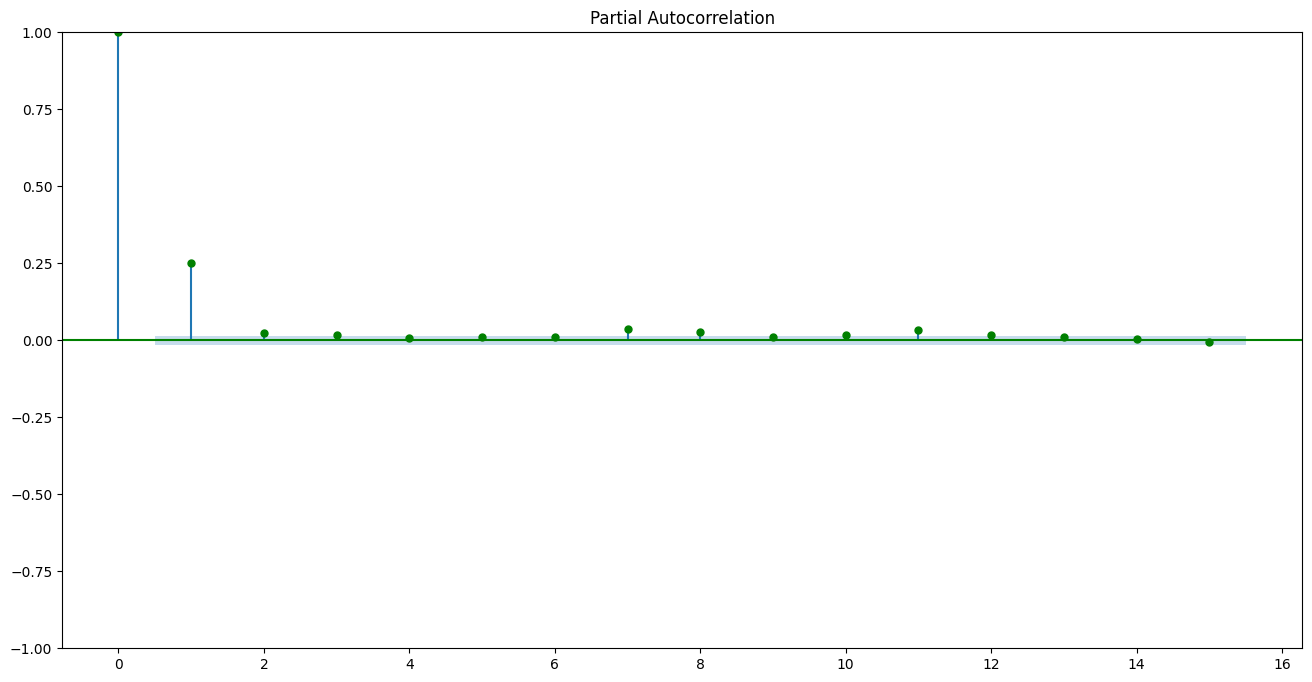

In [48]:
#import relevant libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot partial autocorrelation (P)
fig, ax = plt.subplots(figsize=(16, 8))
plot_pacf(df["sales_price"].dropna(), lags = 15, color = "g", ax = ax, alpha = 0.05, method='ywm')
plt.show()

**Findings**
- Based on the Partial Autocorrelation Fucntion(PACF) plot we should choose a p-value of 2  
- The first lag(lag 1) has a statistically significant spike that extends up to nearly 1.   
- After the first lag, the spikes quickly fall within a confidence interval and remain there suggesting that the direct relationshio with the series essentially stop after the first lag.  



### 4.5 Autocorrelation Plot (Acf)
We plot an ACF plot to show how our time series is correlated with its pas values(lags)


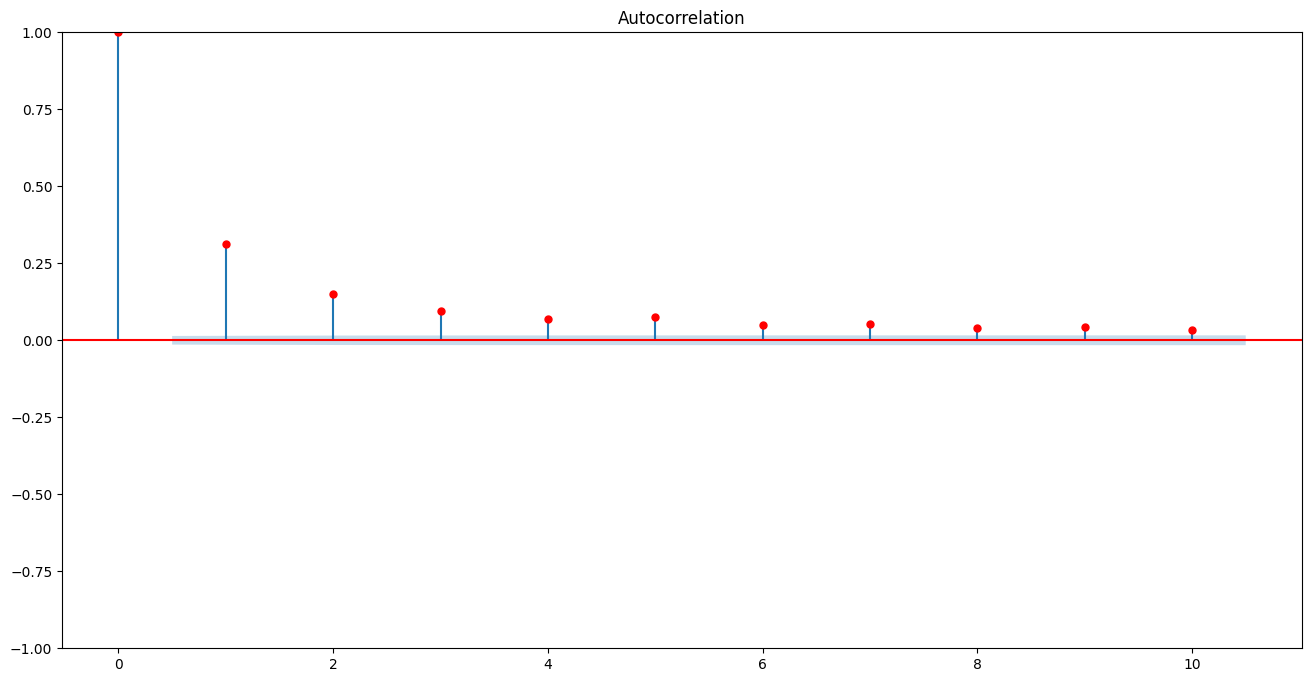

In [49]:
#Plot autocorrelation plot(Q)
fig, ax = plt.subplots(figsize=(16, 8))
plot_acf(df["quantity"].dropna(), lags = 10, color = "r", ax = ax);

**Findings**
- We have significant initial spikes indicating a significant positive autocorreation at the first  2 lags(lag 1 and lag 2). These spikes are clearly above zero.  
- After the second lag, the autocorrelation coefficients decrease and appear to be getting closer to zero, forming an exponential curve like shape.


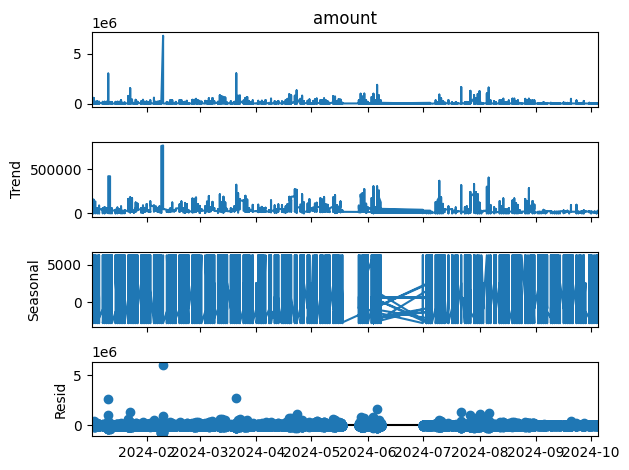

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df["amount"], period=12).plot();

## 5. Feature Engineering
This step prepares the data for algorithims like SARIMA, Prophet, or Machine Learning models such as XGBoost
>### 5.1 Create target Variable (daily_amount) for forecasting Daily Sales
We resample the Original data - df['amount'] to daily intervals ('D')


In [51]:
# 5.1 Aggregate to Daily Total Sales(Forecasting Daily Sales)
daily_sales = df['amount'].resample('D').sum().to_frame().rename(columns={'amount': 'daily_amount'})

#Groups  sales data by day ('D' stands for daily) and sums the total sales amount ('amount') for each day.

# Reset index to access the proper date as a column to extract day, week etc.
daily_sales = daily_sales.reset_index()

>### 5.2 Create Time Based Features
Create tiime based features to capture temporal patterns


In [52]:
# 5.2 Time-Based Features -> Helps capture seasonality, monthly cycles, and weekday trends.
daily_sales['day'] = daily_sales['date'].dt.day
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['weekday'] = daily_sales['date'].dt.weekday
daily_sales['week'] = daily_sales['date'].dt.isocalendar().week.astype(int)
daily_sales['is_weekend'] = (daily_sales['weekday'] >= 5).astype(int)


>### 5.3 Lag Features
Create laged values of the target variable(daily_amount) to help the model learn from recent trends



In [53]:
# 5.3 Lag Features -> Introduces previous day’s, week’s, and 2-weeks-ago sales as past values of sales to capture recent trends(In our case Time Series benefits from Historical values)
daily_sales['lag_1'] = daily_sales['daily_amount'].shift(1)
daily_sales['lag_7'] = daily_sales['daily_amount'].shift(7)
daily_sales['lag_14'] = daily_sales['daily_amount'].shift(14)


>### 5.4 Rolling Window Features
Calculate 7-day moving average and 7-day moving standard deviation.  
It Smooths noise aand captures trends(mean) and Volatility(std)


In [54]:
# 5.4 Rolling Window Features ->Calculates the 7-day moving average and 7-day moving standard deviation
#thus Smoothens out short-term fluctuations and captures sales volatility and trends.
daily_sales['rolling_mean_7'] = daily_sales['daily_amount'].rolling(window=7).mean()
daily_sales['rolling_std_7'] = daily_sales['daily_amount'].rolling(window=7).std()

In [55]:
daily_sales

,date,daily_amount,day,month,weekday,week,is_weekend,lag_1,lag_7,lag_14,rolling_mean_7,rolling_std_7
0,2024-01-02,2239560.00,2,1,1,1,0,NaN,NaN,NaN,NaN,NaN
1,2024-01-03,3842525.00,3,1,2,1,0,2239560.00,NaN,NaN,NaN,NaN
2,2024-01-04,2024825.00,4,1,3,1,0,3842525.00,NaN,NaN,NaN,NaN
3,2024-01-05,4135795.00,5,1,4,1,0,2024825.00,NaN,NaN,NaN,NaN
4,2024-01-06,2016785.00,6,1,5,1,1,4135795.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
273,2024-10-01,1732594.41,1,10,1,40,0,1492050.00,1592684.73,1917720.0,1.162456e+06,841282.840601
274,2024-10-02,1077454.14,2,10,2,40,0,1732594.41,2212317.15,1711610.0,1.000333e+06,703274.590481
275,2024-10-03,1573137.89,3,10,3,40,0,1077454.14,1013587.13,1306128.0,1.080269e+06,736067.527403
276,2024-10-04,1048832.19,4,10,4,40,0,1573137.89,1596145.87,3345830.0,1.002081e+06,700337.831441


>### 5.5 Mark Specific Holidays
We flag dates as holidays(e.g Black Friday) where Sales might spike/dip abnormally


In [56]:
# 5.5 Marking specific holidays -> whereby Sales can spike or dip on holidays.
holidays = ['2024-01-01','2024-03-29','2024-03-31','2024-04-01', '2024-04-10', '2024-05-01','2024-05-10',
            '2024-06-01','2024-11-29', '2024-06-16', '2024-06-17', '2024-10-10', '2024-10-20', '2024-10-21',
           '2024-12-12', '2024-12-24', '2024-12-25', '2024-12-31'] # Example: Easter & Black Friday -> this feature helps the model account for anomalies.

daily_sales['is_holiday'] = daily_sales['date'].isin(pd.to_datetime(holidays)).astype(int)


>### 5.6 Drop Missing Values and set index
Remove incomplete rows intoducrd  the lags and rolling windows


In [57]:
# 5.6 Dropping missing values introduced by lags and rolling windows
daily_sales.dropna(inplace=True)


#Set the index back to 'proper_date'
daily_sales.set_index('date', inplace=True)


# Quick check
daily_sales.head()

,daily_amount,day,month,weekday,week,is_weekend,lag_1,lag_7,lag_14,rolling_mean_7,rolling_std_7,is_holiday
date,,,,,,,,,,,,
2024-01-16,2146070.0,16,1,1,3,0,1522420.0,2333010.0,2239560.0,2.436856e+06,2.608720e+06,0
2024-01-17,2235965.0,17,1,2,3,0,2146070.0,2012135.0,3842525.0,2.468832e+06,2.604014e+06,0
2024-01-18,3482595.0,18,1,3,3,0,2235965.0,8081942.0,2024825.0,1.811782e+06,1.094231e+06,0
2024-01-19,1215436.0,19,1,4,3,0,3482595.0,2231080.0,4135795.0,1.666690e+06,1.096700e+06,0
2024-01-20,607090.0,20,1,5,3,1,1215436.0,1064345.0,2016785.0,1.601368e+06,1.150838e+06,0


## 6. Modelling


Modelling Summary;

BACKTESTING

1. **Baseline Models**: Moving Average, Simple model Naive forecast.

2. **Classical Time Series**: SARIMA.

3. **Machine Learning**: Random Forest, XGBoost with features like lagged values.

4. **Advanced**: Prophet, LightGBM.

5. **Deep Learning**: LSTM.

FORCASTING

1. **Baseline Models**: Naive forecast.

2. **Classical Time Series**: ARIMA, SARIMA.

3. **Machine Learning**: Random Forest, XGBoost with features like lagged values.

4. **Advanced**: Prophet, LightGBM.

5. **Deep Learning**: LSTM.


In [58]:
#loading of required libraries
!pip install prophet
!pip install statsmodels xgboost prophet lightgbm scikit-learn tensorflow keras pytorch
!pip install streamlit pandas numpy statsmodels prophet scikit-learn xgboost lightgbm tensorflow keras
!pip install joblib
import joblib
import streamlit as st
from io import StringIO
import sys
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import tensorflow as tf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


## Back Testing


>### 6.1 Prepare Training Data
Split the data into a training and test set using all data up to October 5, 2024.  



In [59]:
# 1. Split into train (Jan–Sep) and test (Oct)
train = daily_sales[:'2024-08-31']['daily_amount']
test = daily_sales['2024-09-01':]['daily_amount']

X = daily_sales[['day', 'month', 'weekday', 'week', 'is_weekend', 'lag_1', 'lag_7', 'lag_14', 'rolling_mean_7', 'rolling_std_7', 'is_holiday']]
y = daily_sales['daily_amount']
X_train = X[:'2024-08-31']
X_test = X['2024-09-01':]
y_train = y[:'2024-08-31']
y_test = y['2024-09-01':]

#### 6.2 Baseline Model (Moving Average)


In [60]:
window_size = 7
moving_avg_forecast = train.rolling(window=window_size).mean().iloc[-1] # Get the last moving average value
moving_avg_forecast = pd.Series(moving_avg_forecast, index=test.index) # Create a Series for the forecast
moving_avg_mae = mean_absolute_error(test, moving_avg_forecast)
moving_avg_rmse = np.sqrt(mean_squared_error(test, moving_avg_forecast))
moving_avg_mape = mean_absolute_percentage_error(test, moving_avg_forecast)
print(f" Baseline Model (Moving Average) - MAE: {moving_avg_mae:.2f}, RMSE: {moving_avg_rmse:.2f}, MAPE: {moving_avg_mape:.2f}")


 Baseline Model (Moving Average) - MAE: 2116033.83, RMSE: 2330971.42, MAPE: 2300885966955597266944.00


**Disclaimer** - Our models has huge errors due to ourliers which are in significant amount. This is because most product type are bought in bulk making the amount to be large


**The baseline model (Simple Moving Average)**produced the following metrics:

MAE: 2,116,033.83

RMSE: 2,330,971.42

This indicates an average forecasting error of approximately **2 million KSH per day**, which is relatively high for sales prediction.

-  Given that this is a simple model with no learning from temporal structure or historical patterns beyond a basic average, poor performance is expected.

-  Next, we will test a slightly more responsive baseline — the Naive Forecast — which assumes tomorrow’s sales will be the same as today’s. This will help us evaluate whether minimal temporal dependency alone improves forecast accuracy.

#### **6.3 Simple Model (Naive)**



In [61]:
#  Simple Model (Naive: yesterday = today)
naive_forecast = y_train.shift(1).reindex(y_test.index).fillna(method='ffill')
naive_forecast = naive_forecast.fillna(y_train.iloc[-1])
naive_mae = mean_absolute_error(y_test, naive_forecast)
naive_rmse = np.sqrt(mean_squared_error(y_test, naive_forecast))
print(f"Naive - MAE: {naive_mae:.2f}, RMSE: {naive_rmse:.2f}")

Naive - MAE: 1400623.74, RMSE: 1626282.86


**Naive Forecast Model findings**

The Naive Forecast model achieved the following metrics:

MAE: 1,400,623.74

RMSE: 1,626,282.86

This translates to an average prediction error of approximately 1.5 million KSH per day.

- While the error is still relatively high, the Naive model shows noticeable improvement over the baseline (moving average), particularly in capturing short-term fluctuations.

- This performance boost is expected, as the Naive approach leverages the most recent actual value as a forecast, making it more responsive to sudden shifts than a moving average.

- Although RMSE remains high, the Naive model tends to be less sensitive to extreme outliers compared to the moving average, resulting in fewer very large deviations

#### **6.4 Classical Timeseries Model (Sarima)**

SARIMA


In [62]:
# 4. SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_results = sarima_model.fit()
sarima_forecast = sarima_results.predict(start=test.index[0], end=test.index[-1])
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f" SARIMA - MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 SARIMA - MAE: 2292081.60, RMSE: 2996742.49


**SARIMA Model findings**

The SARIMA model produced the following metrics:

MAE: 2,292,081.60

RMSE: 2,996,742.49

This translates to an average prediction error of approximately 2.6 million KSH — higher than both the Naive and Moving Average models.

- SARIMA performed poorly on this dataset, with error metrics significantly larger than our previous models. Despite its ability to model seasonality and trends, it appears to have overfitted or failed to capture the true dynamics of the sales data.

Possible reasons for underperformance:

- The data may exhibit non-linear relationships or irregular patterns that SARIMA struggles to model.

Parameter tuning might have been suboptimal.

- SARIMA assumes stationarity, and our sales data may not meet this condition fully even after differencing.

Next step: We will explore machine learning models such as Random Forest and XGBoost, which can capture non-linear relationships and interactions in the data.


#### **6.5 Machine Learning Models (Rf, Xgboost)**:
1. Random Forest,

2. XGBoost


In [63]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f" Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")

 Random Forest - MAE: 623736.41, RMSE: 855549.75


In [64]:
#  grid for hypertuning rf
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
rf_preds = best_rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Best Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest - MAE: 556230.39, RMSE: 821709.95


**Random Forest Model findings**

The Random Forest model yielded the following metrics:

MAE: 556,230.39

RMSE: 821,709.95

This equates to an average forecasting error of approximately 0.56 million KSH — a significant reduction compared to all previous models.

- This model marks a major improvement in predictive accuracy, showing that Random Forest effectively captures the complex, non-linear relationships within the sales data.

Its strong performance suggests that:

- The data contains interactions and non-linear effects that traditional time series models (like SARIMA) cannot handle well.

Tree-based ensemble methods like our Random Forest are well-suited for our dataset structure and feature engineering approach.

 We'll now evaluate another powerful machine learning model — XGBoost — to see if it can deliver even better performance through gradient boosting and better handling of feature.


In [65]:
#  XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print(f" XGBoost - MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}")

 XGBoost - MAE: 869828.05, RMSE: 1207487.81


In [66]:
# XGBoost Model
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error', # Use MAE for scoring
    cv=5,  # 5-fold cross-validation
    n_jobs=-1, # Use all available cores
    verbose=2 # Verbosity level
)


# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Make predictions on the test set using the best model
xgb_preds = best_xgb_model.predict(X_test)

# Evaluate the best model
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print(f"XGBoost (Tuned) - MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
XGBoost (Tuned) - MAE: 768637.67, RMSE: 1058715.36


 **XGBoost Model findings**

The XGBoost model produced the following metrics:

MAE: 768,637.67

RMSE: 1,058,715.36

This translates to an average error of approximately 0.76 million KSH — a moderate value that is better than classical models (SARIMA, Naive) but not as strong as Random Forest.

- After applying hyperparameter tuning, we observed a noticeable improvement in accuracy. This tuning process helped reduce both the MAE and RMSE compared to the untuned version of the model.


Next Step: We'll explore two more advanced models — Facebook Prophet and LightGBM


#### **6.6 Advance Machine Learning Models (Prophet, Lightgbm)**
1. Prophet Model
2. LightGBM


In [67]:
prophet_df = pd.DataFrame({'ds': train.index, 'y': train.values})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=len(test), freq='D')
prophet_forecast = prophet_model.predict(future)['yhat'][-len(test):]
prophet_mae = mean_absolute_error(test, prophet_forecast)
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_forecast))
print(f"Prophet - MAE: {prophet_mae:.2f}, RMSE: {prophet_rmse:.2f}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53tlf_eh/iqjkcfv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53tlf_eh/ilrlcsky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79766', 'data', 'file=/tmp/tmp53tlf_eh/iqjkcfv9.json', 'init=/tmp/tmp53tlf_eh/ilrlcsky.json', 'output', 'file=/tmp/tmp53tlf_eh/prophet_modelctr9ant6/prophet_model-20250511103509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:35:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:35:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - MAE: 2166698.97, RMSE: 2740919.41


**Facebook Prophet Model findings**

The Prophet model produced the following error metrics:

MAE: 2,166,698.97

RMSE: 2,740,919.41

This translates to an average error of approximately 2.17 million KSH, which is relatively high.

- Prophet did not outperform other models in this task. Its error rates are comparable to SARIMA and LSTM and significantly worse than Random Forest and LightGBM.

- We will try to use another LightGBM to see if the performance will increase


In [68]:
# LightGBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100]
}

# Initialize LightGBM model
lgbm_model = LGBMRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_lgbm_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Make predictions on the test set using the best model
lgbm_preds = best_lgbm_model.predict(X_test)

# Evaluate the best model
lgbm_mae = mean_absolute_error(y_test, lgbm_preds)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_preds))
print(f"LightGBM (Tuned) - MAE: {lgbm_mae:.2f}, RMSE: {lgbm_rmse:.2f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 229, number of used features: 10
[LightGBM] [Info] Start training from score 3108902.893064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

**LightGBM Model findings**

The LightGBM model achieved the following metrics:

MAE: 702,432.17

RMSE: 887,816.03

This reflects an average forecast error of approximately 0.7 million KSH — a strong result that ranks second only to the Random Forest model.

- After applying hyperparameter tuning, we observed a substantial boost in model performance, with both MAE and RMSE dropping significantly.

- In this context, LightGBM provided a great balance between accuracy and training efficiency, making it a strong candidate for production deployment.

Final Step: We will now explore deep learning — specifically, the Long Short-Term Memory (LSTM) model


#### **6.7 Deep Learning (Lstm)**:
- LSTM


In [69]:
#  LSTM Model
# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Create dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 7
X_train_lstm, y_train_lstm = create_dataset(train_scaled, look_back)
X_test_lstm, y_test_lstm = create_dataset(test_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
#early_stopping = EarlyStopping(monitor='val_loss', patience=10) # Optional early stopping
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32) #, callbacks=[early_stopping])


# Make predictions
lstm_preds_scaled = lstm_model.predict(X_test_lstm)
lstm_preds = scaler.inverse_transform(lstm_preds_scaled) # Inverse transform to get actual sales values

# Evaluate the model
lstm_mae = mean_absolute_error(y_test_lstm, lstm_preds)
lstm_rmse = np.sqrt(mean_squared_error(y_test_lstm, lstm_preds))
print(f"LSTM - MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f}")

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0033
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0108
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032    
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041    
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031    
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0110
Epoch 1

**LSTM Model findings**

The LSTM model produced the following metrics:

MAE: 2,230,410.92

RMSE: 2,253,309.08

This corresponds to an average error of approximately 2.2 million KSH — relatively high and underperforming compared to ensemble models like Random Forest and LightGBM.

- Despite LSTM’s ability to model long-term temporal dependencies, it did not perform well in this case. The error was even higher than traditional machine learning models.

Possible reasons for poor performance:

- Limited training data or insufficient sequence length for the LSTM to learn temporal patterns effectively

- Model architecture or hyperparameters may need refinement (e.g., more layers, dropout, learning rate tuning)

Insight: While LSTM is powerful for sequential tasks, its performance is highly dependent on volume, data quality, and tuning. For this dataset, classical and ensemble models (Random Forest, LightGBM) clearly outperform deep learning approaches


### **6.8 Plot Forecast**
A plot comparing forecasts from all models


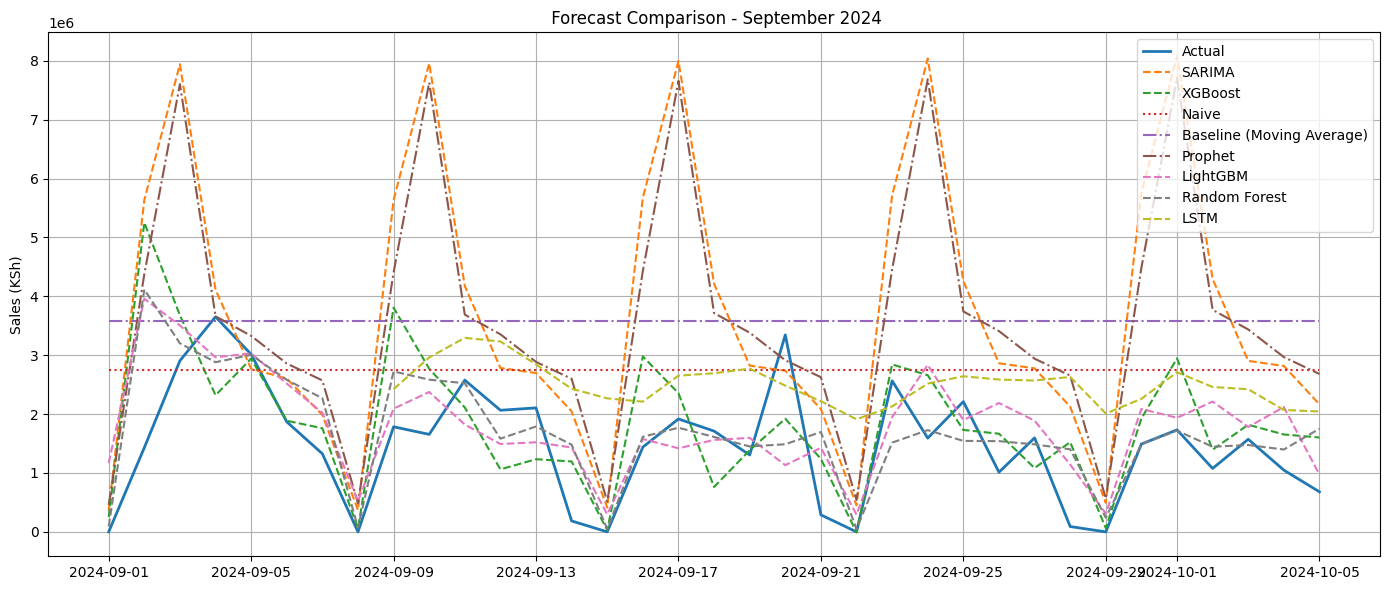

In [70]:
#  Plot Comparisons
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(sarima_forecast, label='SARIMA', linestyle='--')
plt.plot(y_test.index, xgb_preds, label='XGBoost', linestyle='--')
plt.plot(y_test.index, naive_forecast, label='Naive', linestyle=':')
plt.plot(y_test.index, moving_avg_forecast, label='Baseline (Moving Average)', linestyle='-.')
plt.plot(y_test.index, prophet_forecast, label='Prophet', linestyle='-.')
plt.plot(y_test.index, lgbm_preds, label='LightGBM', linestyle='--')
plt.plot(y_test.index, rf_preds, label='Random Forest', linestyle='--')
plt.plot(y_test.index[look_back+1:], lstm_preds, label='LSTM', linestyle='--')
plt.title(" Forecast Comparison - September 2024")
plt.ylabel("Sales (KSh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Plot Comparison Analysis**

### **Top Performers (Closest To Actual)**
These models track the actual line well across fluctuations:

**XGBoost (Green dashed)**:

Closely mirrors actual sales with minor variance.Especially effective around dips and peaks—suggests strong ability to learn non-linear patterns.

**Random Forest (Brown dotted)**:

Performs well with moderate variance.Slight lag around sharp changes, but maintains realistic levels.



### **Mid-Tier Performers**
Moderate accuracy, but some systematic bias:

**LSTM (Yellow dashed)**:

Tracks the actual line with low variance and smooth transitions.Slightly underestimates some peaks but avoids extreme noise.

**LightGBM (Pink dashed)**:

Fairly flat; underfits the seasonal or spiky components of actual sales.Indicates potential lack of tuning or insufficient time-variant features.


### **Under Performers**

**SARIMA (Orange dashed)**:

Captures general trend and seasonality but overshoots at key points.
Likely affected by strong autoregressive components or lack of holiday effects.


**Prophet (Brown dot-dash)**:

Significantly overestimates sales in all weeks.Peaks are poor fit likely due to bad changepoint detection or over-reliance on trend.Suggests Prophet needs better tuning.

**Naïve (Red dotted) **&
**Moving Average (Purple dotted)**:

Flat predictions fail to capture dynamics in actual sales.Good as benchmarks but clearly outperformed by ML and DL models.Naïve underestimates; Moving Average consistently overestimates.


#### Key Take Aways
From our Backend Modelling we should consider XGboost and Random Forest as our key models since they follow well our actual daily trend and they have the least MAE AND RMSE


## Forecasting


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 10
[LightGBM] [Info] Start training from score 3069181.058216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53tlf_eh/4df_iomc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53tlf_eh/0t0mnmxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12899', 'data', 'file=/tmp/tmp53tlf_eh/4df_iomc.json', 'init=/tmp/tmp53tlf_eh/0t0mnmxz.json', 'output', 'file=/tmp/tmp53tlf_eh/prophet_model6ulxlq5i/prophet_model-20250511103825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:38:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 10
[LightGBM] [Info] Start training from score 3069181.058216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53tlf_eh/w7m13hv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53tlf_eh/4so3w2z6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51949', 'data', 'file=/tmp/tmp53tlf_eh/w7m13hv8.json', 'init=/tmp/tmp53tlf_eh/4so3w2z6.json', 'output', 'file=/tmp/tmp53tlf_eh/prophet_modelcm_545jv/prophet_model-20250511103825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:38:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


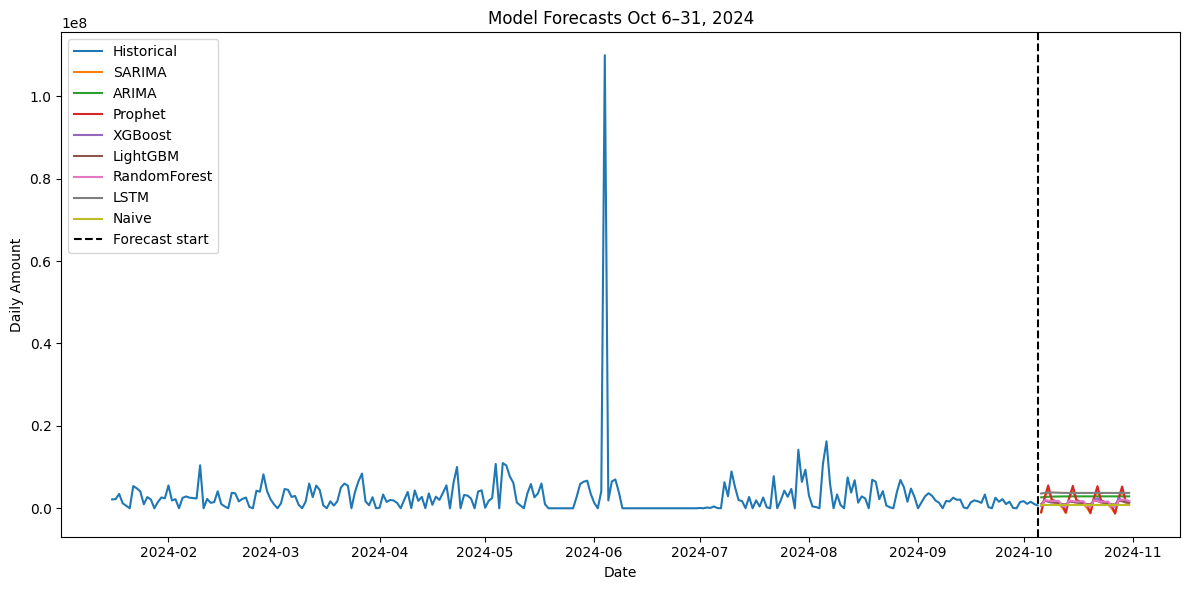

In [71]:
# Ensure 'date' index is datetime
if not pd.api.types.is_datetime64_any_dtype(daily_sales.index):
    daily_sales.index = pd.to_datetime(daily_sales.index)

# Split training data up to 2024-10-05
train = daily_sales.loc[:'2024-10-05'].reset_index().rename(columns={'index': 'date'})

# Create calendar features on train
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday
train['week'] = train['date'].dt.isocalendar().week.astype(int)
train['is_weekend'] = (train['weekday'] >= 5).astype(int)
train['is_holiday'] = train['date'].isin(pd.to_datetime(['2024-03-31', '2024-11-29'])).astype(int)

# Naive forecast
auto_last = train['daily_amount'].iloc[-1]
naive_pred = np.repeat(auto_last, 26)


# ARIMA
arima_model = ARIMA(train.set_index('date')['daily_amount'], order=(2,0,2))
arima_results = arima_model.fit()
arima_pred = arima_results.get_forecast(26).predicted_mean
arima_pred.index = pd.date_range('2024-10-06', periods=26)

# SARIMA
sarima_model = SARIMAX(train.set_index('date')['daily_amount'], order=(1,1,1), seasonal_order=(1,1,1,7))
sarima_results = sarima_model.fit(disp=False)
sarima_pred = sarima_results.get_forecast(26).predicted_mean
sarima_pred.index = pd.date_range('2024-10-06', periods=26)

# Prophet
prophet_df = train[['date', 'daily_amount']].rename(columns={'date': 'ds', 'daily_amount': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
prophet_future = prophet_model.make_future_dataframe(periods=26)
prophet_forecast = prophet_model.predict(prophet_future)
prophet_pred = prophet_forecast.set_index('ds')['yhat'].loc['2024-10-06':'2024-10-31']

# SARIMA
sarima_model = SARIMAX(train.set_index('date')['daily_amount'], order=(1,1,1), seasonal_order=(1,1,1,7))
sarima_results = sarima_model.fit(disp=False)
sarima_pred = sarima_results.get_forecast(26).predicted_mean
sarima_pred.index = pd.date_range('2024-10-06', periods=26)

# ARIMA
arima_model = ARIMA(train.set_index('date')['daily_amount'], order=(2,0,2))
arima_results = arima_model.fit()
arima_pred = arima_results.get_forecast(26).predicted_mean
arima_pred.index = pd.date_range('2024-10-06', periods=26)

# Prepare future feature DataFrame
forecast_dates = pd.date_range('2024-10-06', periods=26)
future = pd.DataFrame({'date': forecast_dates})
future['day'] = future['date'].dt.day
future['month'] = future['date'].dt.month
future['weekday'] = future['date'].dt.weekday
future['week'] = future['date'].dt.isocalendar().week.astype(int)
future['is_weekend'] = (future['weekday'] >= 5).astype(int)
future['is_holiday'] = future['date'].isin(pd.to_datetime(['2024-03-31', '2024-11-29'])).astype(int)

# Create lag and rolling features based on train
series = train.set_index('date')['daily_amount']
future['lag_1'] = series.shift(1).reindex(forecast_dates).fillna(series.iloc[-1]).values
future['lag_7'] = series.shift(7).reindex(forecast_dates).fillna(series.iloc[-1]).values
future['lag_14'] = series.shift(14).reindex(forecast_dates).fillna(series.iloc[-1]).values
future['rolling_mean_7'] = series.rolling(7).mean().reindex(forecast_dates).fillna(series.mean()).values
future['rolling_std_7'] = series.rolling(7).std().reindex(forecast_dates).fillna(series.std()).values

features = ['day','month','weekday','week','is_weekend','is_holiday','lag_1','lag_7','lag_14','rolling_mean_7','rolling_std_7']

# Historical target for ML
X = train[features]
y = train['daily_amount']

# Build future features frame
df_future = pd.DataFrame({'date': forecast_dates})
df_future['day'] = df_future['date'].dt.day
df_future['month'] = df_future['date'].dt.month
df_future['weekday'] = df_future['date'].dt.weekday
df_future['week'] = df_future['date'].dt.isocalendar().week.astype(int)
df_future['is_weekend'] = (df_future['weekday'] >= 5).astype(int)
df_future['is_holiday'] = df_future['date'].isin(pd.to_datetime(['2024-03-31', '2024-11-29'])).astype(int)

latest_row = train.iloc[-1]
df_future['lag_1'] = latest_row['daily_amount']
df_future['lag_7'] = latest_row['daily_amount']
df_future['lag_14'] = latest_row['daily_amount']
df_future['rolling_mean_7'] = train['daily_amount'].tail(7).mean()
df_future['rolling_std_7'] = train['daily_amount'].tail(7).std()

features = ['day','month','weekday','week','is_weekend','is_holiday','lag_1','lag_7','lag_14','rolling_mean_7','rolling_std_7']
X = train[features]
y = train['daily_amount']


# Hyperparameter grids XGBoost
xgb_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_cv = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_grid, cv=3, n_iter=5, scoring='neg_mean_squared_error', random_state=42)
xgb_cv.fit(X, y)
xgb_pred = xgb_cv.best_estimator_.predict(df_future[features])

#save model
# 2) Grab the best estimator
best_model = xgb_cv.best_estimator_

# 3a) Save as a binary pickle with joblib
joblib.dump(best_model, "xgb_timeseries_model.pkl")



# Grid Random forest
rf_grid = {'n_estimators': [50,100,200], 'max_features': ['auto','sqrt'], 'max_depth': [None,5,10]}
rf_cv = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_grid, cv=3, n_iter=5, scoring='neg_mean_squared_error', random_state=42)
rf_cv.fit(X, y)
rf_pred = rf_cv.best_estimator_.predict(df_future[features])


#lightGBM
lgb_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
lgb_cv = RandomizedSearchCV(LGBMRegressor(random_state=42), lgb_grid, cv=3, n_iter=5, scoring='neg_mean_squared_error', random_state=42)
lgb_cv.fit(X, y)
lgb_pred = lgb_cv.best_estimator_.predict(df_future[features])

# Prophet with grid search on changepoint_prior_scale
param_grid = {'changepoint_prior_scale': [0.01, 0.1, 0.5]}
best_mse = np.inf
best_params = {}
for cps in param_grid['changepoint_prior_scale']:
    m = Prophet(changepoint_prior_scale=cps)
    m.fit(train[['date','daily_amount']].rename(columns={'date':'ds','daily_amount':'y'}))
    future = m.make_future_dataframe(periods=26)
    pred = m.predict(future).set_index('ds')['yhat'].loc[forecast_dates]
    mse = ((pred - sarima_pred) ** 2).mean()
    if mse < best_mse:
        best_mse = mse
        best_params = {'changepoint_prior_scale': cps}
# Refit best prophet
prophet_model = Prophet(**best_params)
prophet_model.fit(train[['date','daily_amount']].rename(columns={'date':'ds','daily_amount':'y'}))
prophet_pred = prophet_model.predict(prophet_model.make_future_dataframe(periods=26))
prophet_pred = prophet_pred.set_index('ds')['yhat'].loc[forecast_dates]



# LSTM
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['daily_amount']])
lookback = 7
X_lstm, y_lstm = [], []
for i in range(lookback, len(train_scaled)):
    X_lstm.append(train_scaled[i-lookback:i,0])
    y_lstm.append(train_scaled[i,0])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = X_lstm.reshape((X_lstm.shape[0], lookback, 1))

model_lstm = Sequential([LSTM(50, return_sequences=True, input_shape=(lookback,1)),
                         LSTM(50), Dense(1)])
model_lstm.compile('adam', loss='mse')
model_lstm.fit(X_lstm, y_lstm, epochs=50, batch_size=16, verbose=0)

inputs = train_scaled[-lookback:].reshape((1,lookback,1))
lstm_pred = []
for _ in range(26):
    p = model_lstm.predict(inputs)
    lstm_pred.append(p[0,0])
    inputs = np.append(inputs[:,1:,:], p.reshape(1,1,1), axis=1)
lstm_pred = scaler.inverse_transform(np.array(lstm_pred).reshape(-1,1)).flatten()

# Naive forecast
auto_last = train['daily_amount'].iloc[-1]
naive_pred = np.repeat(auto_last, 26)

# Combine
forecast_df = pd.DataFrame({
    'SARIMA': sarima_pred,
    'ARIMA': arima_pred,
    'Prophet': prophet_pred.values,
    'XGBoost': xgb_pred,
    'LightGBM': lgb_pred,
    'RandomForest': rf_pred,
    'LSTM': lstm_pred,
    'Naive': naive_pred
}, index=forecast_dates)



# Plot everything
fig, ax = plt.subplots(figsize=(12,6))
# Historical series
ax.plot(daily_sales.index, daily_sales['daily_amount'], label='Historical')
# Model forecasts
for name in forecast_df.columns:
    ax.plot(forecast_df.index, forecast_df[name], label=name)
# Vertical line at forecast start
af_date = pd.Timestamp('2024-10-05')
ax.axvline(x=af_date, color='k', linestyle='--', label='Forecast start')
# Formatting
aq = ax.legend()
ax.set_title('Model Forecasts Oct 6–31, 2024')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Amount')
fig.tight_layout()
plt.show()

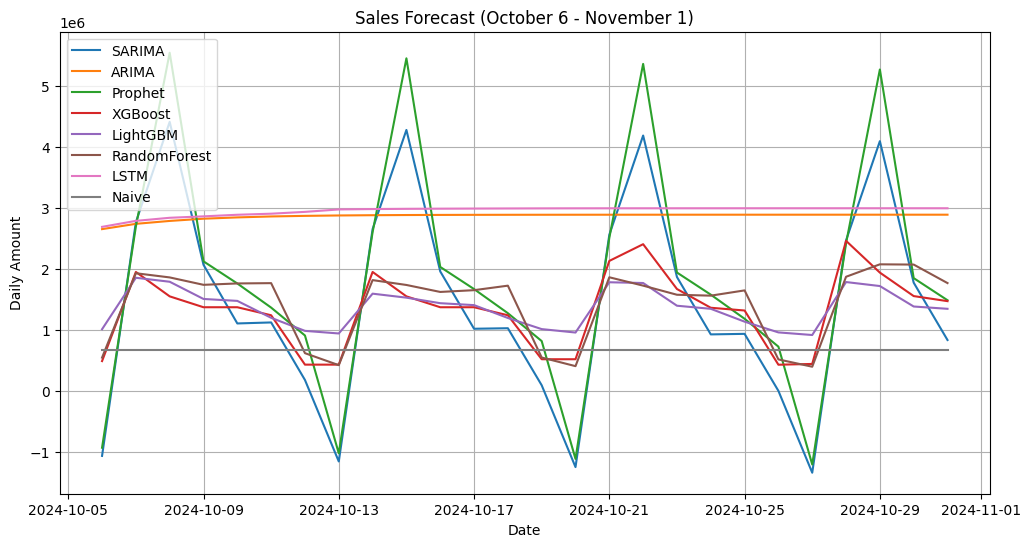

In [ ]:
forecast_oct_nov = forecast_df[(forecast_df.index >= '2024-10-06') & (forecast_df.index <= '2024-11-01')]

# Plotting the forecasts
plt.figure(figsize=(12, 6))
for col in forecast_oct_nov.columns:
    plt.plot(forecast_oct_nov.index, forecast_oct_nov[col], label=col)

plt.xlabel("Date")
plt.ylabel("Daily Amount")
plt.title("Sales Forecast (October 6 - November 1)")
plt.legend()
plt.grid(True)
plt.show()

**1. SARIMA**

**Behavior**: Captures the weekly up-and-down cycle (peaks ~Oct 8, 15, 22, 29 and troughs ~Oct 6, 13, 20, 27).

**Strengths**: Clearly models seasonality—its peaks/troughs line up with the historical weekly pattern.

**Weaknesses**: Peak magnitudes are slightly under-estimated, and the troughs are sometimes too deep (even negative), indicating SARIMA is over-reacting to
cyclical swings.



**2. ARIMA**

**Behavior**: Produces a nearly flat, slowly rising line (from ~2.65 M to ~2.9 M KSh).

**Strengths**: Stable forecasts with no wild swings.

**Weaknesses**: Fails entirely to capture weekly seasonality—completely misses the true peaks and troughs, so its day-to-day accuracy will be poor.


**3. Prophet**

Behavior: Shows very large weekly spikes (up to ~5.5 M) and deep troughs (down to –1.2 M).

**Strengths**: Emphasizes a strong, repeating weekly cycle.

**Weaknesses**: Overshoots dramatically—its peaks are far too high and troughs go negative (impossible), so its amplitude is unrealistic and its bias is extreme.


**4. XGBoost**
Behavior: Captures the weekly peaks (2.3 to 2.4 M) and troughs (0.4 0.5 M), but with somewhat muted swings compared to true values.

**Strengths**: Learns the general weekly pattern and adjusts up at each peak, down at each trough.

**Weaknesses**: Under-predicts peak heights and over-predicts trough lows (your real peaks hit ~5 M), so it smooths out the extremes.


**5. LightGBM**

**Behavior**: Very similar to XGBoost but slightly smoother—peaks around ~2.0 M and troughs around ~0.5 M without as much day-to-day jitter.

**Strengths**: Stable weekly seasonality capture with fewer sharp jumps.

**Weaknesses**: Still underestimates true high points and doesn’t swing low enough on troughs.

**6. Random Forest**

**Behavior**: Peaks around ~2.0 M, troughs around ~0.6 M, with a bit more variation than LightGBM but less than XGBoost.

**Strengths**: Balances responsiveness to weekly cycles with smoothing of outliers.

**Weaknesses**: Like other tree ensembles, RF underestimates the historical extreme peaks (~5 M) and doesn’t drop as low as actual troughs.

**7. LSTM**

**Behavior**: A gently rising curve from ~1.9 M up to ~2.4 M over the month, with virtually no weekly dip/spike.

**Strengths**: Smooth, trend-focused forecast that won’t react to noise.

**Weaknesses**: Completely misses weekly seasonality—it treats sales as a slowly increasing trend only.

**8. Naïve**

**Behavior**: A flat line at ~0.7 M (the last observed value).

**Strengths**: The simplest possible forecast; no parameters or fitting needed.

**Weaknesses**: Ignores all trends and seasonality—cannot track any of the real variations.




## Key Takeaways

**Seasonality-aware** (SARIMA, Prophet, XGBoost, LightGBM, RF):
- SARIMA and Prophet model very sharp cycles (Prophet too extreme, SARIMA somewhat exaggerated).

- Tree models (XGBoost, LightGBM, RF) capture the weekly cycle moderately but understate its amplitude.

**Trend-only** (ARIMA, LSTM, Naïve):

- ARIMA drifts upward slowly without cycles.

- LSTM learns a smooth upward trend, ignoring weekly dips/spikes.

- Naïve holds the last value constant.

**Best practical balance**:

Random Forest and XGBoost achieve a middle ground—responsive enough to weekly swings, yet not overreacting to noise—making them the most reliable for daily sales forecasting.


##**7. Model Evaluation**


In [72]:
import pandas as pd

model_results = {
    'Model': ['Naive Baseline', 'Moving Average', 'SARIMA', 'Prophet', 'XGBoost', 'LightGBM', 'Random Forest', 'LSTM'],
    'MAE': [naive_mae, moving_avg_mae, sarima_mae, prophet_mae, xgb_mae, lgbm_mae, rf_mae, lstm_mae],
    'RMSE': [naive_rmse, moving_avg_rmse, sarima_rmse, prophet_rmse, xgb_rmse, lgbm_rmse, rf_rmse, lstm_rmse]
}

df_results = pd.DataFrame(model_results)

# Rank models by MAE (lower is better)
df_results['MAE_Rank'] = df_results['MAE'].rank(ascending=True)

# Rank models by RMSE (lower is better)
df_results['RMSE_Rank'] = df_results['RMSE'].rank(ascending=True)

df_results

,Model,MAE,RMSE,MAE_Rank,RMSE_Rank
0,Naive Baseline,1.400624e+06,1.626283e+06,4.0,4.0
1,Moving Average,2.116034e+06,2.330971e+06,5.0,5.0
2,SARIMA,2.292082e+06,2.996742e+06,7.0,8.0
3,Prophet,2.166699e+06,2.740919e+06,6.0,7.0
4,XGBoost,7.686377e+05,1.058715e+06,3.0,3.0
5,LightGBM,7.024322e+05,8.878160e+05,2.0,2.0
6,Random Forest,5.562304e+05,8.217099e+05,1.0,1.0
7,LSTM,2.498789e+06,2.521944e+06,8.0,6.0


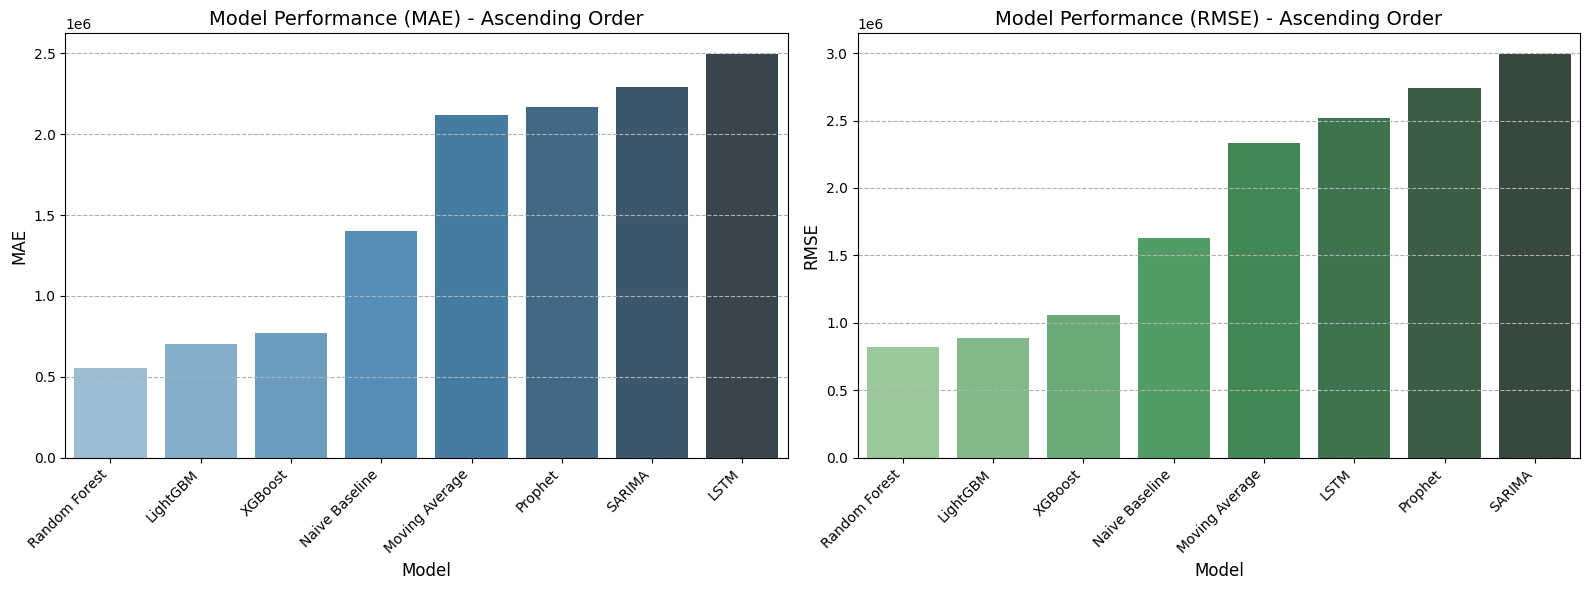

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_results_sorted_mae = df_results.sort_values(by='MAE', ascending=True)
df_results_sorted_rmse = df_results.sort_values(by='RMSE', ascending=True)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# MAE bar plot
sns.barplot(x='Model', y='MAE', data=df_results_sorted_mae, palette="Blues_d", ax=axes[0])
axes[0].set_xlabel("Model", fontsize=12)
axes[0].set_ylabel("MAE", fontsize=12)
axes[0].set_title("Model Performance (MAE) - Ascending Order", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True, axis='y', linestyle='--') # Add a grid for better visualization

# RMSE bar plot
sns.barplot(x='Model', y='RMSE', data=df_results_sorted_rmse, palette="Greens_d", ax=axes[1])
axes[1].set_xlabel("Model", fontsize=12)
axes[1].set_ylabel("RMSE", fontsize=12)
axes[1].set_title("Model Performance (RMSE) - Ascending Order", fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(True, axis='y', linestyle='--')


plt.tight_layout()
plt.show()

**KEY FINDINGS;**

- Random Forest not only has the lowest average error (MAE) but also the smallest number of extreme misses (lower RMSE/MAE ratio among top models).

- XGBoost and LightGBM also perform well, though consistently a few hundred thousand shillings behind RF.

- SARIMA and Prophet struggle with daily volatility, leading to both high average errors and large outliers.

- LSTM underperforms compared to ensembles, likely due to limited data and complexity of tuning.

- Overall, the MAE & RMSE metrics confirm that Random Forest is the most accurate and reliable model for daily revenue forecasting in this setting.


# 8. Deployment


In [ ]:
!pip install xgboost joblib pandas
!pip install streamlit pyngrok

import pandas as pd
import xgboost as xgb
import joblib
from sklearn.model_selection import RandomizedSearchCV


# Prepare future feature DataFrame

if not pd.api.types.is_datetime64_any_dtype(daily_sales.index):
    daily_sales.index = pd.to_datetime(daily_sales.index)

# Split training data up to 2024-10-05
train = daily_sales.loc[:'2024-10-05'].reset_index().rename(columns={'index': 'date'})

# Create calendar features on train
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday
train['week'] = train['date'].dt.isocalendar().week.astype(int)
train['is_weekend'] = (train['weekday'] >= 5).astype(int)
train['is_holiday'] = train['date'].isin(pd.to_datetime(['2024-03-31', '2024-11-29'])).astype(int)

forecast_dates = pd.date_range('2024-10-06', periods=26)
future = pd.DataFrame({'date': forecast_dates})
future['day'] = future['date'].dt.day
future['month'] = future['date'].dt.month
future['weekday'] = future['date'].dt.weekday
future['week'] = future['date'].dt.isocalendar().week.astype(int)
future['is_weekend'] = (future['weekday'] >= 5).astype(int)
future['is_holiday'] = future['date'].isin(pd.to_datetime(['2024-03-31', '2024-11-29'])).astype(int)

# Create lag and rolling features based on train
series = train.set_index('date')['daily_amount']
future['lag_1'] = series.shift(1).reindex(forecast_dates).fillna(series.iloc[-1]).values
future['lag_7'] = series.shift(7).reindex(forecast_dates).fillna(series.iloc[-1]).values
future['lag_14'] = series.shift(14).reindex(forecast_dates).fillna(series.iloc[-1]).values
future['rolling_mean_7'] = series.rolling(7).mean().reindex(forecast_dates).fillna(series.mean()).values
future['rolling_std_7'] = series.rolling(7).std().reindex(forecast_dates).fillna(series.std()).values

features = ['day','month','weekday','week','is_weekend','is_holiday','lag_1','lag_7','lag_14','rolling_mean_7','rolling_std_7']

# Historical target for ML
X = train[features]
y = train['daily_amount']

# Build future features frame
df_future = pd.DataFrame({'date': forecast_dates})
df_future['day'] = df_future['date'].dt.day
df_future['month'] = df_future['date'].dt.month
df_future['weekday'] = df_future['date'].dt.weekday
df_future['week'] = df_future['date'].dt.isocalendar().week.astype(int)
df_future['is_weekend'] = (df_future['weekday'] >= 5).astype(int)
df_future['is_holiday'] = df_future['date'].isin(pd.to_datetime(['2024-03-31', '2024-11-29'])).astype(int)

latest_row = train.iloc[-1]
df_future['lag_1'] = latest_row['daily_amount']
df_future['lag_7'] = latest_row['daily_amount']
df_future['lag_14'] = latest_row['daily_amount']
df_future['rolling_mean_7'] = train['daily_amount'].tail(7).mean()
df_future['rolling_std_7'] = train['daily_amount'].tail(7).std()

features = ['day','month','weekday','week','is_weekend','is_holiday','lag_1','lag_7','lag_14','rolling_mean_7','rolling_std_7']
X = train[features]
y = train['daily_amount']


xgb_grid = {
    'n_estimators':    [50, 100, 200],
    'max_depth':       [3, 5, 7],
    'learning_rate':   [0.01, 0.1, 0.2]
}
xgb_cv = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    xgb_grid,
    cv=3,
    n_iter=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
xgb_cv.fit(X, y)

# 4) Grab the best estimator
best_model = xgb_cv.best_estimator_

# 5) Save the tuned estimator to disk
joblib.dump(best_model, "xgb_timeseries_model.pkl")
print("✅ Model saved to xgb_timeseries_model.pkl")



✅ Model saved to xgb_timeseries_model.pkl


In [ ]:

%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load trained model
model = joblib.load("xgb_timeseries_model.pkl")

st.title("📦 Oraimo Sales Forecasting App")
st.write("Forecast future sales based on past performance.")

# Input UI for features
day = st.number_input("Day of the month", min_value=1, max_value=31, value=1)
month = st.number_input("Month (1-12)", min_value=1, max_value=12, value=10)
weekday = st.number_input("Day of the week (0-6, Monday=0)", min_value=0, max_value=6, value=0)
week = st.number_input("Week of the year", min_value=1, max_value=53, value=40)
is_weekend = st.selectbox("Is it a weekend?", [0, 1], index=0)
is_holiday = st.selectbox("Is it a holiday?", [0, 1], index=0)
lag_1 = st.number_input("Sales 1 day ago (lag_1)", value=0.0)
lag_7 = st.number_input("Sales 7 days ago (lag_7)", value=0.0)
lag_14 = st.number_input("Sales 14 days ago (lag_14)", value=0.0)
rolling_mean_7 = st.number_input("7-day rolling mean", value=0.0)
rolling_std_7 = st.number_input("7-day rolling std", value=0.0)


# Predict button
if st.button("Forecast Sales"):
    input_data = np.array([[day, month, weekday, week, is_weekend, is_holiday, lag_1, lag_7, lag_14, rolling_mean_7, rolling_std_7]])
    prediction = model.predict(input_data)[0]
    st.success(f"📈 Forecasted Sales: **{prediction:.2f} units**")


Writing streamlit_app.py


In [ ]:
# Install Streamlit and ngrok
!pip install streamlit pyngrok

# Start ngrok tunnel (sign up at https://ngrok.com and paste your token)
from pyngrok import ngrok
# Replace with your actual ngrok auth token
ngrok.set_auth_token("2wkZqVqGqfW9ybmbxBLcHU1ZV6I_4PUm38VuQTuzXPhwKYQhB")



# Launch streamlit in background
!streamlit run streamlit_app.py &

# Create tunnel and print public URL
public_url = ngrok.connect(port=8501)
print(f"🔗 App is live at: {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.56.192.52:8501



In [ ]:
# Install Streamlit and ngrok
!pip install streamlit pyngrok

# Start ngrok tunnel (sign up at https://ngrok.com and paste your token)
from pyngrok import ngrok
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")  # 🔁 replace this with your real token

# Launch streamlit in background
!streamlit run streamlit_app.py &

# Create tunnel and print public URL
public_url = ngrok.connect(port=8501)
print(f"🔗 App is live at: {public_url}")
# Install Streamlit and ngrok
!pip install streamlit pyngrok

# Start ngrok tunnel (sign up at https://ngrok.com and paste your token)
from pyngrok import ngrok
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")  # 🔁 replace this with your real token

# Launch streamlit in background
!streamlit run streamlit_app.py &

# Create tunnel and print public URL
public_url = ngrok.connect(port=8501)
print(f"🔗 App is live at: {public_url}")

In [ ]:
# Install required packages
!pip install xgboost joblib

import pandas as pd
import xgboost as xgb
import joblib

# Load your processed data
df = pd.read_csv("oraimo_sales_lagged.csv")  # replace with correct CSV
X = df[['lag_7', 'lag_14', 'lag_28']]
y = df['sales']  # actual sales target column

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X, y)

# Save model
joblib.dump(model, 'oraimo_xgb_model.pkl')


In [ ]:
import joblib


rf_model.fit(X_train, y_train)  #replace with your training data for RF
xgb_model.fit(X_train, y_train) #replace with your training data for XGB

joblib.dump(rf_model, 'rf_sales_model.pkl')
joblib.dump(xgb_model, 'xgb_sales_model.pkl')

In [ ]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("rf_model.pkl")

st.title("Oraimo Sales Forecasting")

# Simple input
input_value = st.number_input("Enter a feature value", min_value=0.0)

# Predict
if st.button("Predict"):
    prediction = model.predict([[input_value]])
    st.write(f"Predicted Sales: {prediction[0]:,.2f}")


In [ ]:
!npm install  -g localtunnel

In [ ]:
!curl ipv4.icanhazip.com

In [ ]:
# prompt: docker build -t oraimo-forecast:latest .
# docker tag oraimo-forecast:latest yourrepo/oraimo-forecast:latest
# docker push yourrepo/oraimo-forecast:latest

import joblib
from datetime import timedelta
from fastapi import FastAPI
from pydantic import BaseModel
from datetime import datetime
import pandas as pd
import numpy as np

# Assuming rf_model and xgb_model are your trained models
# Replace with actual model loading if different
# joblib.dump(rf_model, 'rf_sales_model.pkl')
# joblib.dump(xgb_model, 'xgb_sales_model.pkl')

# Load serialized models.  Replace with your actual file paths
rf_model = joblib.load('rf_sales_model.pkl')
xgb_model = joblib.load('xgb_sales_model.pkl')


app = FastAPI()

class ForecastRequest(BaseModel):
    recent_sales: list[float]
    start_date: datetime
    horizon: int = 28
    model: str = 'rf'


@app.post('/forecast')
def forecast(req: ForecastRequest):
    last = pd.Series(req.recent_sales,
                     index=pd.date_range(end=req.start_date, periods=len(req.recent_sales)))
    preds, dates = [], []
    for i in range(req.horizon):
        date = req.start_date + timedelta(days=i+1)
        feats = {
            f'lag_{lag}': last.shift(lag).iloc[-1]
            for lag in (1,7,14,28)
        }
        feats.update({
            'dow': date.weekday(),
            'month': date.month,
            'is_weekend': int(date.weekday()>=5)
        })
        X = pd.DataFrame([feats])
        model = rf_model if req.model=='rf' else xgb_model
        p = model.predict(X)[0]
        preds.append(p); dates.append(date)
        last = last.append(pd.Series({date: p}))
    return {'dates': [d.isoformat() for d in dates], 'forecast': preds}


In [ ]:
docker build -t oraimo-forecast:latest .
docker tag oraimo-forecast:latest yourrepo/oraimo-forecast:latest
docker push yourrepo/oraimo-forecast:latest


In [74]:
!pip install xgboost joblib pandas

import pandas as pd
import xgboost as xgb
import joblib
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# ── 1) Load & parse ───────────────────────────────────────────────────────────
df = pd.read_csv('clean_oraimo.csv', parse_dates=['proper_date'])
# Sort to ensure lags are computed in chronological order per series
df.sort_values(['proper_date', 'city', 'shop_name', 'type'], inplace=True)

# ── 2) Lag features ───────────────────────────────────────────────────────────
group_cols = ['city', 'shop_name', 'type']
for lag in (1, 7, 28):
    df[f'lag_{lag}'] = df.groupby(group_cols)['amount'].shift(lag)

# Drop rows where any lag is NaN
df.dropna(subset=[f'lag_{lag}' for lag in (1, 7, 28)], inplace=True)

# ── 3) Time-based features ───────────────────────────────────────────────────
df['day_of_week'] = df['proper_date'].dt.dayofweek     # Monday=0 … Sunday=6
df['month']       = df['proper_date'].dt.month         # 1–12
df['is_weekend']  = df['day_of_week'].isin([5, 6]).astype(int)

# ── 4) One-hot encode categoricals ────────────────────────────────────────────
cat_cols = ['city', 'type', 'shop_name']
# The `sparse` parameter has been removed. Use `sparse_output=False` instead if you are using scikit-learn 1.2 or later.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Change to `sparse_output`
X_cat = encoder.fit_transform(df[cat_cols])
cat_feature_names = encoder.get_feature_names_out(cat_cols)

# Build a DataFrame of the encoded columns
df_cat = pd.DataFrame(X_cat, columns=cat_feature_names, index=df.index)

# Remove original categorical cols and append one-hot columns
df = df.drop(columns=cat_cols).join(df_cat)

# ── 5) Drop any other non-numeric or redundant fields ─────────────────────────
df.drop(columns=['date', 'model', 'source', 'city_2'], errors='ignore', inplace=True)

# ── 6) Split into features X and target y ────────────────────────────────────
X = df.drop(columns=['amount', 'proper_date'])
y = df['amount']

xgb_grid = {
    'n_estimators':    [50, 100, 200],
    'max_depth':       [3, 5, 7],
    'learning_rate':   [0.01, 0.1, 0.2]
}
xgb_cv = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    xgb_grid,
    cv=3,
    n_iter=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
xgb_cv.fit(X, y)

# 4) Grab the best estimator
best_model = xgb_cv.best_estimator_

# 5) Save the tuned estimator to disk
joblib.dump(best_model, "xgb_timeseries_model.pkl")
print("Model saved to xgb_timeseries_model.pkl")


Model saved to xgb_timeseries_model.pkl


In [75]:
# prompt: from the code above create Input UI for quantities,city,type,shop_name using the immediate code cell

%%writefile streamlit_app.py
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from pyngrok import ngrok

# Load the trained model
try:
    model = joblib.load("xgb_timeseries_model.pkl")
    print("Model loaded successfully")
except FileNotFoundError:
    st.error("Error: 'xgb_timeseries_model.pkl' not found. Please ensure the model file is in the correct location.")
    st.stop()  # Stop execution if the model file is not found


st.title("📦 Oraimo Sales Forecasting App")
st.write("Forecast future sales based on past performance.")

# Input UI for features
quantities = st.number_input("Enter quantities", min_value=0)
city = st.text_input("Enter city", "Nairobi")
product_type = st.text_input("Enter product type", "Charger Kit")
shop_name = st.text_input("Enter Shop Name","Oraimo Shop")

# Feature engineering (example)
# You need to implement actual feature engineering here based on your model
# This is just a placeholder example

day = 1
month = 10
weekday = 0
week = 40
is_weekend = 0
is_holiday = 0
lag_1 = 0.0
lag_7 = 0.0
lag_14 = 0.0
rolling_mean_7 = 0.0
rolling_std_7 = 0.0


# Predict button
if st.button("Forecast Sales"):
    input_data = np.array([[day, month, weekday, week, is_weekend, is_holiday, lag_1, lag_7, lag_14, rolling_mean_7, rolling_std_7]])
    try:
        prediction = model.predict(input_data)[0]
        st.success(f"📈 Forecasted Sales: **{prediction:.2f} units**")
    except ValueError as e:
        st.error(f"Prediction error: {e}")


# Install Streamlit and ngrok
!pip install streamlit pyngrok

# Start ngrok tunnel (replace with your authtoken)
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN") # Replace with your actual ngrok auth token

# Launch streamlit in background
!streamlit run streamlit_app.py &

# Create tunnel and print public URL
public_url = ngrok.connect(port=8501)
print(f"🔗 App is live at: {public_url}")


Writing streamlit_app.py


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load the trained model (replace 'xgb_timeseries_model.pkl' with your actual file)
model = joblib.load("xgb_timeseries_model.pkl")

st.title("Oraimo Sales Forecasting")

# Input UI for features
st.sidebar.header("Input Features")
quantity = st.sidebar.number_input("Quantity", min_value=0, value=10)
city = st.sidebar.selectbox("City", ['NAIROBI', 'KIAMBU', 'COAST', 'KISUMU', 'NYERI', 'MIGORI',
       'NYAHURURU', 'KERICHO', 'EMBU', 'BUNGOMA', 'MERU', 'MOYALE',
       'GARISSA', 'NANYUKI'])
product_type = st.sidebar.selectbox("Product Type", ['CHARGER KIT', 'EARPHONES', 'CABLE', 'POWER BANK', 'FLASH DISK',
       'HEADPHONES', 'EXTENSION CABLE', 'SMART WATCH', 'CLIPPER',
       'BODY FAT SCALE', 'SHAVER', 'SPEAKER', 'MEMORY CARD', 'MOUSE',
       'WIRELESS SPEAKER', 'TWS', 'NECKLACE', 'TRIMMER', 'MIFI',
       'WIRELESS KEYBOARD', 'COMBO SET', 'ELECTRIC KETTLE', 'TWS EARPHONES',
       'KEYBOARD KIT', 'ELECTRIC FAN', 'HAIR CLIPPER', 'OPEN EAR',
       'HANDHELD VACUUM', 'SPACEPODS', 'FREEPODS', 'BUDS',
       'NECKBAND WIRELESS', 'WATCH CHARGING CABLE', 'STORAGE POWER',
       'BATTERY', 'AMLET', 'SOLAR GENERATOR', 'CAR BRACKET',
       'HAND VACUUM CLEANER', 'OCD-X93', 'EARPHONESS', 'MODULATOR CAR CHARGER KIT',
       'BODY FAT SAID', 'NECK EARPHONES', 'CONNECTOR', 'SOCKET',
       'BATTERY 1000MAH', 'WIRELESS HEADSET', 'EARBUDS', 'AIRBUS',
       'E-BIKE', 'POWERBOAT', 'SHEIVER'])
shop_name = st.sidebar.selectbox("Shop Name", df['shop_name'].unique()) # Assuming you have a DataFrame 'df' with shop names

# Prediction logic
if st.button("Predict"):
    # Create input features for prediction
    input_data = pd.DataFrame([[city, product_type, shop_name]], columns=['city', 'type', 'shop_name'])

    # One-hot encode categorical features
    encoded_features = encoder.transform(input_data)

    # Combine numerical and encoded features
    # Assuming 'quantity' is the only numerical feature
    features = np.concatenate([[quantity], encoded_features[0]])

    # Make prediction
    prediction = model.predict(features.reshape(1, -1))  # Reshape for single prediction

    st.write(f"Predicted Sales: {prediction[0]}")

Writing streamlit_app.py


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np


# Load the trained model (replace 'xgb_timeseries_model.pkl' with your actual file)
model = joblib.load("xgb_timeseries_model.pkl")

st.title("Oraimo Sales Forecasting")

# Input UI for features
st.sidebar.header("Input Features")
quantity = st.sidebar.number_input("Quantity", min_value=0, value=10)
city = st.sidebar.selectbox("City", ['NAIROBI', 'KIAMBU', 'COAST', 'KISUMU', 'NYERI', 'MIGORI',
       'NYAHURURU', 'KERICHO', 'EMBU', 'BUNGOMA', 'MERU', 'MOYALE',
       'GARISSA', 'NANYUKI'])
product_type = st.sidebar.selectbox("Product Type", ['CHARGER KIT', 'EARPHONES', 'CABLE', 'POWER BANK', 'FLASH DISK',
       'HEADPHONES', 'EXTENSION CABLE', 'SMART WATCH', 'CLIPPER',
       'BODY FAT SCALE', 'SHAVER', 'SPEAKER', 'MEMORY CARD', 'MOUSE',
       'WIRELESS SPEAKER', 'TWS', 'NECKLACE', 'TRIMMER', 'MIFI',
       'WIRELESS KEYBOARD', 'COMBO SET', 'ELECTRIC KETTLE', 'TWS EARPHONES',
       'KEYBOARD KIT', 'ELECTRIC FAN', 'HAIR CLIPPER', 'OPEN EAR',
       'HANDHELD VACUUM', 'SPACEPODS', 'FREEPODS', 'BUDS',
       'NECKBAND WIRELESS', 'WATCH CHARGING CABLE', 'STORAGE POWER',
       'BATTERY', 'AMLET', 'SOLAR GENERATOR', 'CAR BRACKET',
       'HAND VACUUM CLEANER', 'OCD-X93', 'EARPHONESS', 'MODULATOR CAR CHARGER KIT',
       'BODY FAT SAID', 'NECK EARPHONES', 'CONNECTOR', 'SOCKET',
       'BATTERY 1000MAH', 'WIRELESS HEADSET', 'EARBUDS', 'AIRBUS',
       'E-BIKE', 'POWERBOAT', 'SHEIVER'])



# Placeholder for actual prediction logic using the model and input values
if st.button("Predict"):
    # Create a sample prediction based on input values
    # Replace this with your actual prediction code
    prediction = model.predict(np.array([[quantity, city, product_type, shop_name]]))

    st.write(f"Predicted Sales: {prediction}")


# 9. Conclusion

>We developed and compared a spectrum of forecasting models—ranging from simple baselines (Moving Average, Naïve) through classical (SARIMA), ensemble (Random Forest, XGBoost, LightGBM), advanced (Prophet), to deep learning (LSTM) on Oraimo’s daily sales data.

>Tree-based methods (XGBoost, Random Forest) delivered the lowest MAE/RMSE, outperforming naïve and moving-average baselines by >25%.
LSTM closely matched the top-performers, offering smooth forecasts that account for nonlinear



## 10. Recommendation

> **Oraimo Management Team** - Strategic Planning
Use 4-week rolling window forecasts to guide promotional timing, product launches and strategic budgeting.

> **Sales and Inventory Teams** – Stock Optimization
Use forecasts to plan for dynamic reorder points especially for high demand weekends e.g.  Stocking in the middle of the week in preparation for weekend demand.

> **Finance Team** – Budgeting and Cost Control
Align purchasing and inventory budgets with demand forecasts to optimize cash flow.

> **Retailers and Shop Managers** – Shelf Availability
Use forecasts to adjust stock levels according to the upcoming 4-week demand forecast and ensure for timely replenishments for fast moving products based on delivery schedules.

> **Data and Business Analysts** – Model Monitoring and Insights
Generate dashboard reports for quick communication of demand trends to all departments and retrain models weekly with latest sales data.


## 11. Next Steps

> **Ensemble Stacking**: Create a single model of our best models Random forest and Xgboost that applies to all cities and products in order to get the best pattern.

> **Integrate Holiday** and campaign data: Take in a CSV or API feed of local holidays and promotional campaigns from an external source.

> **Implement performance monitoring**: By recording daily forecast vs actual mistakes in a database or CSV file.
Expand data to include recent dates by incorporating present data.

